# A Study of Prosper Loan Data

## by Michael Wei

## Preliminary Wrangling

> This dataset consists of loan information from the Prosper Data set. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')

prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper.shape

(113937, 81)

In [4]:
prosper['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
prosper['Investors'].value_counts()

1       27814
2        1386
3         991
4         827
5         753
8         753
10        728
6         721
9         721
11        717
7         701
34        701
13        700
33        696
27        683
37        681
25        674
29        671
26        668
31        665
21        664
14        661
35        661
24        661
17        657
39        652
19        652
38        650
30        650
23        649
        ...  
1035        1
779         1
735         1
863         1
645         1
695         1
856         1
630         1
838         1
821         1
693         1
647         1
711         1
692         1
800         1
1011        1
840         1
819         1
755         1
691         1
627         1
818         1
754         1
690         1
609         1
881         1
801         1
752         1
715         1
831         1
Name: Investors, Length: 751, dtype: int64

In [6]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# Get the dates in a datetime format so that we can extract stuff if we need to

prosper['ListingCreationDate'] = pd.to_datetime(prosper['ListingCreationDate'])

In [8]:
# Confirm whether we can see any data. Because the Borrower APR is intended in package the fees that
# a lender pays, if we see a Borrower Rate that's higher, then we know something might be fishy
# about that definition.

prosper[prosper['BorrowerRate'] > prosper['BorrowerAPR']]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [9]:
prosper['CreditScoreRangeLower'].value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [10]:
prosper['CreditScoreRangeUpper'].value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [11]:
prosper['CreditColTest'] = prosper['CreditScoreRangeUpper'] - prosper['CreditScoreRangeLower']

prosper['CreditColTest'].value_counts()

19.0    113346
Name: CreditColTest, dtype: int64

In [12]:
# Find a way to bin the Credit Range

prosper['CreditRange'] = prosper['CreditScoreRangeLower'].astype(str).str.extract(r'(\d{1,3})') + ' - ' + prosper['CreditScoreRangeUpper'].astype(str).str.extract(r'(\d{1,3})')

In [13]:
prosper['CreditRange'].value_counts()

680 - 699    16492
660 - 679    16366
700 - 719    15471
720 - 739    12923
640 - 659    12199
740 - 759     9267
760 - 779     6606
780 - 799     4624
620 - 639     4172
600 - 619     3602
800 - 819     2644
520 - 539     1593
540 - 559     1474
820 - 839     1409
560 - 579     1357
580 - 599     1125
840 - 859      567
500 - 519      554
480 - 499      346
860 - 879      212
460 - 479      141
0 - 19         133
440 - 459       36
880 - 899       27
420 - 439        5
360 - 379        1
Name: CreditRange, dtype: int64

In [14]:
prosper['ListingCreationDate'].describe()

count                         113937
unique                        113064
top       2013-10-02 17:20:16.550000
freq                               6
first     2005-11-09 20:44:28.847000
last      2014-03-10 12:20:53.760000
Name: ListingCreationDate, dtype: object

In [15]:
prosper['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
prosper['CreditRating'] = prosper['CreditGrade'].fillna('') + prosper['ProsperRating (Alpha)'].fillna('');

In [17]:
prosper['CreditRating'].replace(r'', np.nan, regex = True, inplace = True)

prosper['CreditRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: CreditRating, dtype: int64

### What is the structure of your dataset?

* Based on the Prosper Loan Data - Variable Definitions file, we have a substantial amount of data before and after 2009. We might need to look at an analysis before and after 2009. 


### What is/are the main feature(s) of interest in your dataset?

Features of Interest:

Qualitative Variables:
1. LoanStatus - Whether a loan is Cancelled, Chargedoff (The worst one), Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue. 

Quantitative Variables:
1. BorrowerAPR - Effective rate that the borrower pays per year, plus servicing fees. There is a BorrowerRate variable, but this doesn't account for the servicing fee. [Ref. 1]
2. LenderYield - Interest rate less the servicing fee
3. EstimatedEffectiveYield - Final rate that the lender gets, after accounting for servicing fee, uncollected interest, late fees, charge-offs, etc.
4. ProsperScore - Custom score, based on historical data, from 1-10. 10 is the best, or lowest risk. (Post-2009 only)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following variables might have some impact on the type of loan that gets issued (i.e. things that affect Features of Interest):

Qualitative Variables:
1. Term - Months of loan ; Although this sounds quantitative, there are only 12 month, 36 month, and 60 month loans.
2. CreditGrade (Pre-2009 only)
3. ProsperRating (Alpha) - Prosper Rating assigned to loan at the beginning. There is a numeric version, but since we're dealing with a categorical datatype, we will opt to just look at the Alpha version. (Post 2009 only)
4. CreditRating - Combined variable between CreditGrade and ProsperRating (Alpha). We will check to see if our analysis shows anything different with this variable. 
5. ListingCategory (numeric) - Type of listing that the loan falls under, which includes: 0 - Not available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
6. BorrowerState - 2 letter abbreviation of where the loan was created for (Might be interesting to pair with the statuses)
7. Occupation - of Borrower
8. EmploymentStatus - of Borrower
9. IsBorrowerHomeowner - If they have a mortgage on the credit profile
10. CreditRange - Since the delta value between the Upper value and the Lower value is 19 for all of the rows, we can safely just create a range between these bounds. 
11. IncomeRange - Considered categorical, because they are ranges.

Quantitative Variables:
1. DebtToIncomeRatio - Based on when credit profile was pulled, and capped at 10.01 (1001 %)
2. TotalProsperPaymentsBilled - Number of on time payments
3. InvestmentFromFriendsCount - Number of friends that invested in a loan
4. Investors - Number of Lenders

Variables I'm removing and why:
1. ClosedDate - We probably don't need to worry too much about the date that a loan stopped. This variable only applies to loans that are Cancelled, Completed, Chargedoff, and Defaulted.

## Univariate Exploration

In [18]:
base_color = sb.color_palette()[-1]

## Primary Variables of Interest

In [19]:
prosper['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [20]:
# Ordering is worst to best, based on level of lender distaste. A cancelled loan doesn't necessarily
# impact the lender negatively, other than for the fact that the lender has to find another
# borrower. Therefore, we put Cancelled at the end, to represent a 'neutral' status.

ls_order = ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
            'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)', 
            'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress', 'Completed', 'Cancelled']

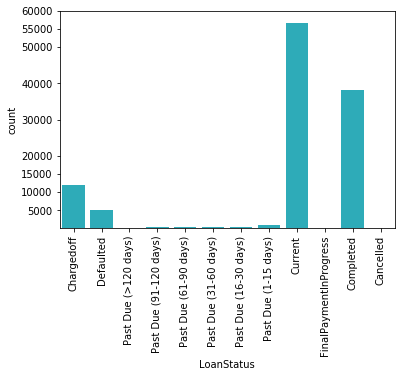

In [21]:
ax_1 = sb.countplot(data = prosper, x = 'LoanStatus', color = base_color,
             order = ls_order)

plt.xticks(rotation = 90)
plt.yticks([5000, 10000, 15000, 20000, 30000, 40000, 50000, 55000, 60000]);

Interpretation: Good thing most of the loans are Current or Completed. There is a substantial number of loans that were Charged Off or Defaulted. 

For EDA purposes, we put in some extra tick marks to help us see the loan values.

In [22]:
# Variable: BorrowerAPR

prosper['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [23]:
# Since we have some null values in the BorrowerAPR column, and there are not that many, we will
# remove these rows

prosper[prosper['BorrowerAPR'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditColTest,CreditRange,CreditRating
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557,HR,36,Completed,2006-01-06 00:00:00,NaN,0.10000,0.0950,...,0.0,0.0,1.000,0,0,0.0,5,NaN,NaN,HR
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887,AA,36,Completed,2006-04-10 00:00:00,NaN,0.06500,0.0550,...,0.0,0.0,1.000,0,0,0.0,5,NaN,NaN,AA
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457,AA,36,Completed,2005-11-29 00:00:00,NaN,0.04350,0.0385,...,0.0,0.0,1.000,0,0,0.0,3,NaN,NaN,AA
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810,AA,36,Completed,2006-03-21 00:00:00,NaN,0.06395,0.0552,...,0.0,0.0,1.000,0,0,0.0,4,NaN,NaN,AA
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753,AA,36,Completed,2008-06-05 00:00:00,NaN,0.06000,0.0550,...,0.0,0.0,1.000,0,0,0.0,10,NaN,NaN,AA
39870,B6E73366056348939D8801F,24,2005-11-20 14:45:55.193,C,36,Completed,2006-10-24 00:00:00,NaN,0.12000,0.1150,...,0.0,0.0,1.000,0,0,0.0,6,NaN,NaN,C
43587,2F123364529418907A58D4C,19,2005-11-18 14:16:59.093,AA,36,Completed,2005-11-29 00:00:00,NaN,0.08500,0.0750,...,0.0,0.0,1.000,0,0,0.0,6,NaN,NaN,AA
62297,2F25336514614362295DA03,7,2005-11-15 18:25:56.107,E,36,Completed,2005-11-30 00:00:00,NaN,0.17000,0.1150,...,0.0,0.0,1.000,0,0,0.0,1,NaN,NaN,E
71280,DED033645500376547AF34E,60,2005-12-29 19:53:41.000,C,36,Completed,2008-04-21 00:00:00,NaN,0.09000,0.0850,...,0.0,0.0,1.000,0,0,0.0,8,NaN,NaN,C
71875,F50A33647261871547E3E0D,68,2006-01-06 13:05:50.890,AA,36,Completed,2006-07-11 00:00:00,NaN,0.07000,0.0650,...,0.0,0.0,1.000,0,0,0.0,1,NaN,NaN,AA


In [24]:
null_apr = prosper[prosper['BorrowerAPR'].isnull()].index

prosper.drop(null_apr, axis = 0, inplace = True)

In [25]:
apr_bins = np.arange(prosper['BorrowerAPR'].min(), prosper['BorrowerAPR'].max() + 0.005, 0.005)

In [26]:
# Helper code for us to see where a few of the spikes are in the histogram we produce below

pd.cut(x = prosper['BorrowerAPR'], bins = apr_bins, include_lowest = False).value_counts()[:10]

(0.357, 0.362]    4390
(0.202, 0.207]    3250
(0.172, 0.177]    3067
(0.292, 0.297]    3013
(0.352, 0.357]    2920
(0.212, 0.217]    2867
(0.157, 0.162]    2814
(0.182, 0.187]    2793
(0.167, 0.172]    2690
(0.122, 0.127]    2603
Name: BorrowerAPR, dtype: int64

In [27]:
mean_APR = prosper['BorrowerAPR'].mean()

low_APR = np.percentile(prosper['BorrowerAPR'], 2.5)
high_APR = np.percentile(prosper['BorrowerAPR'], 97.5)

In [28]:
print('The mean Borrower APR is: {:.2f} %'.format(mean_APR * 100))
print('The 2.5th percentile is: {:.2f} %'.format(low_APR * 100))
print('The 97.5th percentile is: {:.2f} %'.format(high_APR * 100))

The mean Borrower APR is: 21.88 %
The 2.5th percentile is: 8.48 %
The 97.5th percentile is: 35.84 %


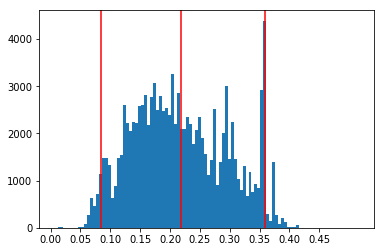

In [29]:
ax_2 = plt.hist(data = prosper, x = 'BorrowerAPR', bins = apr_bins)

plt.axvline(x = mean_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = low_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = high_APR, color = 'r', linewidth = 1.5)

x_range = np.arange(0, 0.45 + 0.05, 0.05)
x_label = ['{:.2f}'.format(v) for v in x_range]

plt.xticks(x_range, x_label);

Interpretation: The average loan rate is almost 22 %, with 95 % of the data falling between 8.5 % and 35.8 %. 

There are also a few spikes around 35 %, 20 %, and 17 % APR, which might be interesting to look at. These ranges are developed based on how we binned the histogram, looking at the top few bins.

Given that a typical loan will be between 10 - 20 % [Ref. 8], seeing an average Borrower APR of 21 % is a bit surprising, since a substantial number of these loans are for Debt Consolidation (See below). This suggests that a lot borrowers were probably being ripped off by even higher interest rates from other loans. 

We'll have to see how these Borrower APRs are broken down.

In [30]:
# Variable: LenderYield

# Check for null values in the LenderYield column

prosper[prosper['LenderYield'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditColTest,CreditRange,CreditRating


In [31]:
prosper['LenderYield'].describe()

count    113912.000000
mean          0.182723
std           0.074506
min          -0.010000
25%           0.124500
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

In [32]:
yield_bins = np.arange(prosper['LenderYield'].min(), prosper['LenderYield'].max() + 0.005, 0.005)

In [33]:
# Helper code for us to see where a few of the spikes are in the histogram we produce below

pd.cut(x = prosper['LenderYield'], bins = yield_bins, include_lowest = False).value_counts()[:10]

(0.305, 0.31]    5667
(0.14, 0.145]    3926
(0.125, 0.13]    3403
(0.155, 0.16]    3208
(0.165, 0.17]    3160
(0.17, 0.175]    3100
(0.145, 0.15]    2991
(0.235, 0.24]    2860
(0.135, 0.14]    2777
(0.19, 0.195]    2732
Name: LenderYield, dtype: int64

In [34]:
mean_yield = prosper['LenderYield'].mean()

low_yield = np.percentile(prosper['LenderYield'], 2.5)
high_yield = np.percentile(prosper['LenderYield'], 97.5)

In [35]:
print('The mean Lender Yield is: {:.2f} %'.format(mean_yield * 100))
print('The 2.5th percentile is: {:.2f} %'.format(low_yield * 100))
print('The 97.5th percentile is: {:.2f} %'.format(high_yield * 100))

The mean Lender Yield is: 18.27 %
The 2.5th percentile is: 6.50 %
The 97.5th percentile is: 32.04 %


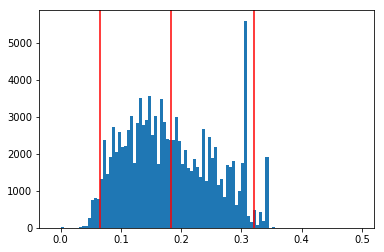

In [36]:
ax_3 = plt.hist(data = prosper, x = 'LenderYield', bins = yield_bins)

plt.axvline(x = mean_yield, color = 'r', linewidth = 1.5)
plt.axvline(x = low_yield, color = 'r', linewidth = 1.5)
plt.axvline(x = high_yield, color = 'r', linewidth = 1.5);

Interpretation: The distribution looks relatively similar to the Borrower APR histogram, except with lower values. The average Lender Yield is roughly 18.3 %, with 95 % of the data falling between 6.5 % and 32.0 %. This makes sense, because after fees, the Lender Yield will be lower than the Borrower APR. 

We can see a few peaks somewhere below the mean Lender Yield, but these counts are closer to the rest of the data. The main peak of interest is the one around 31 %. There is also a small spike at around 35 %. 

In [37]:
# Variable: EstimatedEffectiveYield
# Applicable for loans after 2009. We'll have to look at a subset to see if there is 
# anything interesting. This won't give us an assessment for all of the data, though.

prosper['EstimatedEffectiveYield'].describe()

count    84853.000000
mean         0.168661
std          0.068467
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

In [38]:
prosper[prosper['EstimatedEffectiveYield'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditColTest,CreditRange,CreditRating
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.00,0.00,1.0,0,0,0.00,258,19.0,640 - 659,C
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.00,0.00,1.0,0,0,0.00,41,19.0,480 - 499,HR
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,0.00,0.00,1.0,0,0,0.00,53,19.0,640 - 659,C
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,6012.67,268.96,1.0,0,0,0.00,85,19.0,760 - 779,AA
21,1017340630713945364DA6B,241498,2007-11-30 20:33:49.227,D,36,Completed,2010-12-12 00:00:00,0.21488,0.2075,0.1975,...,0.00,0.00,1.0,0,0,0.00,53,19.0,620 - 639,D
39,109D3366077649289619396,24135,2006-07-11 17:14:14.647,B,36,Completed,2009-10-22 00:00:00,0.15211,0.1450,0.1400,...,0.00,0.00,1.0,0,0,0.00,44,19.0,680 - 699,B
42,10AD33803102786533722BB,93263,2007-02-04 17:24:27.850,HR,36,Chargedoff,2008-08-08 00:00:00,0.30300,0.2900,0.2850,...,1096.92,0.00,1.0,0,0,0.00,15,19.0,520 - 539,HR
46,0F8B34281015537050D4FEC,378497,2008-08-05 19:42:49.197,C,36,Completed,2010-01-29 00:00:00,0.17170,0.1500,0.1400,...,0.00,0.00,1.0,2,1,789.59,103,19.0,660 - 679,C
59,100634009060155161268D8,203384,2007-09-18 13:19:02.487,C,36,Completed,2010-09-26 00:00:00,0.16717,0.1600,0.1500,...,0.00,0.00,1.0,0,0,0.00,193,19.0,640 - 659,C
62,0F183387070536545CB7D86,120164,2007-04-06 23:07:37.940,D,36,Chargedoff,2009-11-24 00:00:00,0.23748,0.2300,0.2100,...,8745.06,0.00,1.0,0,0,0.00,384,19.0,600 - 619,D


In [39]:
subset_eey = prosper[prosper['EstimatedEffectiveYield'].isnull() == False]

subset_eey['EstimatedEffectiveYield'].describe()

count    84853.000000
mean         0.168661
std          0.068467
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

In [40]:
eey_bins = np.arange(subset_eey['EstimatedEffectiveYield'].min(), subset_eey['EstimatedEffectiveYield'].max() + 0.005, 0.005)

In [41]:
# Helper code for us to see where a few of the spikes are in the histogram we produce below

pd.cut(x = prosper['EstimatedEffectiveYield'], bins = eey_bins, include_lowest = False).value_counts()[:10]

(0.287, 0.292]    4156
(0.132, 0.137]    3013
(0.142, 0.147]    2816
(0.172, 0.177]    2780
(0.127, 0.132]    2732
(0.107, 0.112]    2669
(0.152, 0.157]    2456
(0.147, 0.152]    2441
(0.157, 0.162]    2316
(0.137, 0.142]    2240
Name: EstimatedEffectiveYield, dtype: int64

In [42]:
mean_eey = subset_eey['EstimatedEffectiveYield'].mean()

low_eey = np.percentile(subset_eey['EstimatedEffectiveYield'], 2.5)
high_eey = np.percentile(subset_eey['EstimatedEffectiveYield'], 97.5)

In [43]:
print('The mean Estimated Effective Yield is: {:.2f} %'.format(mean_eey * 100))
print('The 2.5th percentile is: {:.2f} %'.format(low_eey * 100))
print('The 97.5th percentile is: {:.2f} %'.format(high_eey * 100))

The mean Estimated Effective Yield is: 16.87 %
The 2.5th percentile is: 5.59 %
The 97.5th percentile is: 29.17 %


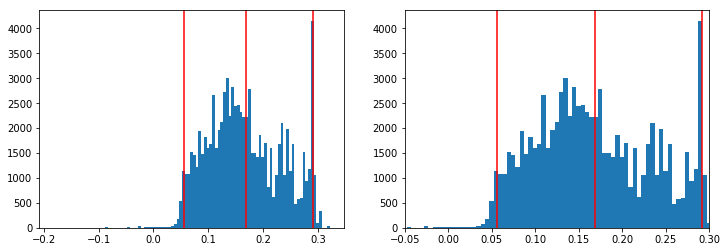

In [44]:
fig = plt.figure(figsize = (12, 4))

ax_4 = plt.subplot(1, 2, 1)
plt.hist(data = subset_eey, x = 'EstimatedEffectiveYield', bins = eey_bins)

plt.axvline(x = mean_eey, color = 'r', linewidth = 1.5)
plt.axvline(x = low_eey, color = 'r', linewidth = 1.5)
plt.axvline(x = high_eey, color = 'r', linewidth = 1.5);

ax_5 = plt.subplot(1, 2, 2)
plt.hist(data = subset_eey, x = 'EstimatedEffectiveYield', bins = eey_bins)

plt.axvline(x = mean_eey, color = 'r', linewidth = 1.5)
plt.axvline(x = low_eey, color = 'r', linewidth = 1.5)
plt.axvline(x = high_eey, color = 'r', linewidth = 1.5)
plt.xlim(-0.05, 0.3);

Interpretation: The distribution is less normal, with a mean of 16.9 %, with 95 % of the data falling between 5.6 % and 29.2 %.

It looks like we unfortunately had a bunch of loans with negative estimated effective yields. The right plot is what most of the data looks like when we zoom in to most of the data points. 

It looks like most loans achieve at least a 5 % yield, after accounting for everything (Service fees, late fees, Charge-offs, etc.) We can also see that a substantial number of loans produced an Estimated Effective Yield of around 29 %.

In [45]:
# Check if a log scale can tell us anything

np.log10(prosper['EstimatedEffectiveYield'].describe())

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


count    4.928667
mean    -0.772984
std     -1.164517
min           NaN
25%     -0.936779
50%     -0.791827
75%     -0.649171
max     -0.494986
Name: EstimatedEffectiveYield, dtype: float64

In [46]:
test_bins = 10 ** np.arange(-1, -0.5 + 0.01, 0.01)

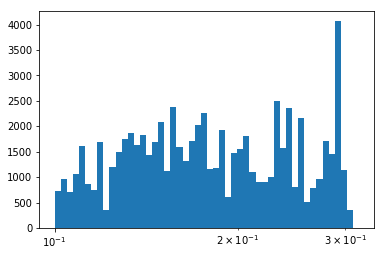

In [47]:
plt.hist(data = subset_eey, x = 'EstimatedEffectiveYield', bins = test_bins)
plt.xscale('log');

Interpretation: A log scale probably won't really tell us anything that a regular histogram, zoomed into the majority of the data, can tell us.

In [48]:
# Variable: ProsperScore
# Note: This looks like it's different from the ProsperRating (See Support Variables)

prosper['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [49]:
prosper['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [50]:
ps_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

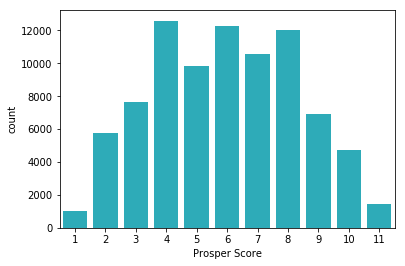

In [51]:
ax_6 = sb.countplot(data = prosper, x = 'ProsperScore', color = base_color,
                    order = ps_order)

plt.xlabel('Prosper Score');

Interpretation: It looks like most of the loans with a Prosper Score are between a Prosper Score of 2 and 10. The distribution looks relatively normal, which suggests that most of the loans are medium risk.

## Support Variables of Interest

In [52]:
# Variable: Term

prosper['Term'].value_counts().index

Int64Index([36, 60, 12], dtype='int64')

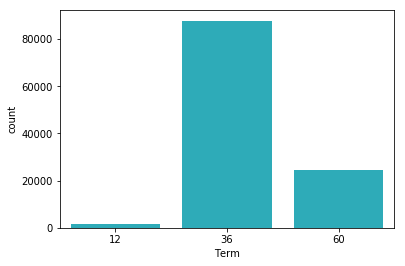

In [53]:
term_order = prosper['Term'].value_counts().sort_index().index

ax_7 = sb.countplot(data = prosper, x = 'Term', color = base_color,
             order = term_order);

Interpretation: Looks like most of the Term data are for 36 month (3 year) loans. 

We can explore whether the loan term plays a role in the Borrower APR or the number of investors.

In [54]:
# Variable: CreditGrade

prosper['CreditGrade'].value_counts()

C     5646
D     5152
B     4387
HR    3506
AA    3495
A     3314
E     3288
NC     140
Name: CreditGrade, dtype: int64

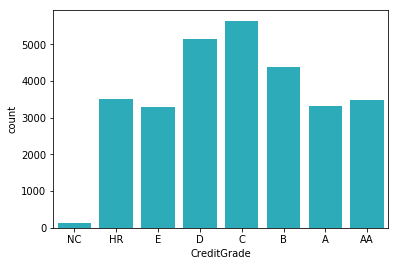

In [55]:
# Ref. 2: CreditGrade ordering

cg_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

ax_8 = sb.countplot(data = prosper, x = 'CreditGrade', color = base_color,
             order = cg_order);

Interpretation: Since we can see that most of the counts are below 5000, we know that this doesn't represent the entire dataset. This is because by definition, the Credit Grade is for loans before 2009. 

Looks like most of the loans are either Credit Grade D, C, or B. Otherwise, the loans are pretty spread out between HR, E, A, and AA.

We can explore how or whether the Credit Grade impacts the Borrower APR.

In [56]:
# Variable: ProsperRating (Alpha)

prosper['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

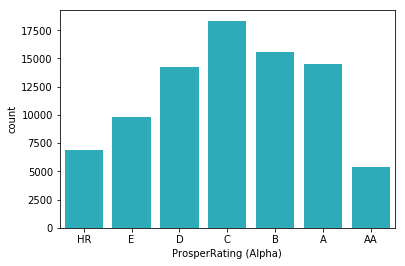

In [57]:
pra_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

ax_9 = sb.countplot(data = prosper, x = 'ProsperRating (Alpha)', color = base_color,
             order = pra_order);

Interpretation: Looks like we have a lot more loans under a C, B, A, and D Prosper Rating, with a lot fewer loans with AA ratings. It also looks like this dataset is probably for loans after 2009.

We can explore how or whether the Prosper Rating (Alpha) impacts the Borrower APR.

In [58]:
sum(prosper['CreditGrade'].value_counts()) + sum(prosper['ProsperRating (Alpha)'].value_counts())

113781

In [59]:
prosper.shape

(113912, 84)

In [60]:
# These are the mystery loans with no CreditGrade or ProsperRating (Alpha)
# However, it looks like people invested in these loans, because a lot of them are Completed

prosper[(prosper['CreditGrade'].isnull()) & (prosper['ProsperRating (Alpha)'].isnull())]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditColTest,CreditRange,CreditRating
150,10683423770994576084943,349447,2008-06-12 11:59:55.217,NaN,36,Completed,2011-04-21 00:00:00,0.08641,0.0830,0.0730,...,0.00,0.0,1.0,0,0,0.00,290,19.0,840 - 859,NaN
528,3BBA345088754410516372A,415089,2009-04-28 14:08:57.100,NaN,36,Completed,2010-11-04 00:00:00,0.17170,0.1500,0.1400,...,0.00,0.0,1.0,0,0,0.00,220,19.0,720 - 739,NaN
725,0A333418840357177C59FEC,319423,2008-04-27 19:21:57.207,NaN,36,Completed,2011-11-22 00:00:00,0.10082,0.0800,0.0700,...,0.00,0.0,1.0,1,0,0.00,120,19.0,740 - 759,NaN
1977,293D3420634449375CF70CE,322485,2008-04-30 16:33:46.990,NaN,36,Completed,2013-03-01 00:00:00,0.17291,0.1365,0.1265,...,0.00,0.0,1.0,0,0,0.00,36,19.0,740 - 759,NaN
3487,04F334232790941784498F1,348957,2008-06-11 16:48:13.620,NaN,36,Completed,2011-05-06 00:00:00,0.16005,0.1385,0.1285,...,0.00,0.0,1.0,0,0,0.00,207,19.0,720 - 739,NaN
6500,4CF63418975035324957F83,314919,2008-04-21 07:36:34.787,NaN,36,Completed,2012-05-22 00:00:00,0.07339,0.0700,0.0600,...,0.00,0.0,1.0,0,0,0.00,163,19.0,720 - 739,NaN
6629,9DBC34072579020712417D6,249518,2007-12-12 09:17:58.200,NaN,36,Completed,2012-01-23 00:00:00,0.20210,0.1800,0.1700,...,0.00,0.0,1.0,0,0,0.00,228,19.0,720 - 739,NaN
7277,54A534342339131622B530C,414823,2008-10-16 20:58:14.297,NaN,36,Completed,2010-12-10 00:00:00,0.22287,0.2005,0.1905,...,0.00,0.0,1.0,0,0,0.00,196,19.0,660 - 679,NaN
8602,E26234329319258215067B2,402435,2008-09-22 14:31:17.130,NaN,36,Completed,2010-07-07 00:00:00,0.28777,0.2645,0.2545,...,0.00,0.0,1.0,0,0,0.00,306,19.0,660 - 679,NaN
9177,0B7D3419070139548758BF2,312805,2008-04-17 11:51:19.233,NaN,36,Completed,2011-01-28 00:00:00,0.10335,0.0825,0.0725,...,0.00,0.0,1.0,0,0,0.00,150,19.0,720 - 739,NaN


In [61]:
# Most of these are Completed loans, so we won't worry too much about these data points

prosper[(prosper['CreditGrade'].isnull()) & (prosper['ProsperRating (Alpha)'].isnull())]['LoanStatus'].value_counts()

Completed     122
Chargedoff      6
Defaulted       3
Name: LoanStatus, dtype: int64

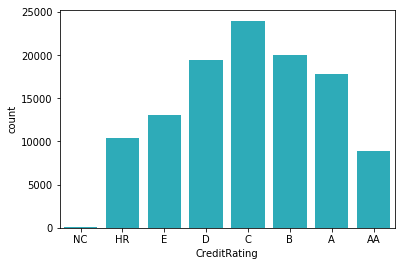

In [62]:
ax_10 = sb.countplot(data = prosper, x = 'CreditRating', color = base_color,
             order = cg_order);

Interpretation: It looks like based on either score, most of the data falls between Credit Grade/Prosper Scores between D and A. 

We probably won't go further with categorizing based on the Either Score metric, because we can't really tell why the data are split up between the 2 columns, or if there are dependencies.

In [63]:
# Variable: ListingCategory (numeric)

prosper['ListingCategory (numeric)'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [64]:
lc_order = prosper['ListingCategory (numeric)'].value_counts().sort_index().index

lc_ticks = ['Not Available (0)', 'Debt Consolidation (1)', 'Home Improvement (2)', 'Business (3)',
            'Personal Loan (4)', 'Student Use (5)', 'Auto (6)', 'Other (7)', 'Baby & Adoption (8)',
            'Boat (9)', 'Cosmetic Procedure (10)', 'Engagement Ring (11)', 'Green Loans (12)',
            'Household Expenses (13)', 'Large Purchages (14)', 'Medical/Dental (15)',
            'Motorcycle (16)', 'RV (17)', 'Taxes (18)', 'Vacation (19)', 'Wedding Loans (20)']

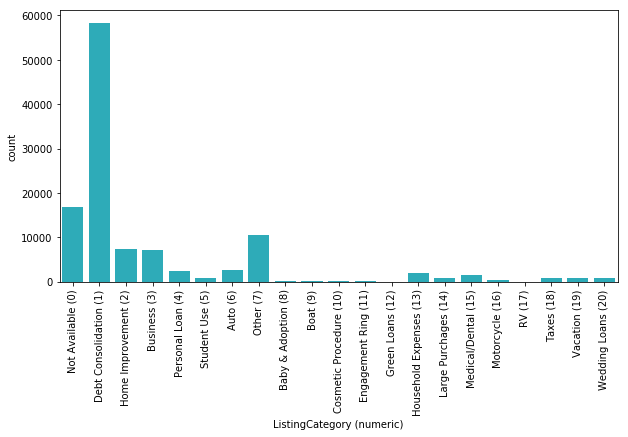

In [65]:
plt.figure(figsize=(10, 5))

ax_11 = sb.countplot(data = prosper, x = 'ListingCategory (numeric)', color = base_color,
                    order = lc_order)

ax_11.set_xticklabels(lc_ticks)
plt.xticks(rotation = 90);

Interpretation: Looks like most of the data are for either Debt Consolidation, Not Available, or Other. Since the data looks so spare amongst the other categories (Except for Home Improvement and Business), we won't go further into exploring this variable. 

In [66]:
na = prosper['ListingCategory (numeric)'].value_counts()[0]
debt = prosper['ListingCategory (numeric)'].value_counts()[1]
other = prosper['ListingCategory (numeric)'].value_counts()[7]

print('Percent of data in Categories 0, 1, 7: {:.2f} %'.format((na + debt + other) * 100 / prosper.shape[0]))

Percent of data in Categories 0, 1, 7: 75.27 %


In [67]:
prosper['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [68]:
bs_order = prosper['BorrowerState'].value_counts().index
bs_order

Index(['CA', 'TX', 'NY', 'FL', 'IL', 'GA', 'OH', 'MI', 'VA', 'NJ', 'NC', 'WA',
       'PA', 'MD', 'MO', 'MN', 'MA', 'CO', 'IN', 'AZ', 'WI', 'OR', 'TN', 'AL',
       'CT', 'SC', 'NV', 'KS', 'KY', 'OK', 'LA', 'UT', 'AR', 'MS', 'NE', 'ID',
       'NH', 'NM', 'RI', 'HI', 'WV', 'DC', 'MT', 'DE', 'VT', 'AK', 'SD', 'IA',
       'WY', 'ME', 'ND'],
      dtype='object')

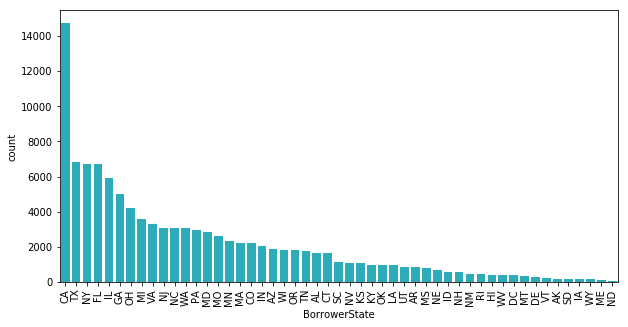

In [69]:
plt.figure(figsize=(10, 5))

ax_12 = sb.countplot(data = prosper, x = 'BorrowerState', color = base_color,
                    order = bs_order)

plt.xticks(rotation = 90);

Interpretation: It looks like we have a much greater number of loans originating in California. After Texas, New York, and Florida, the number of loans decreases steadily.

In [70]:
# Variable: Occupation
# We have a ton of Occupations listed. We can go through these and consolidate to make any plotting
# cleaner.

prosper['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [71]:
# Helper code for us to go through and categorize these occupations better

prosper['Occupation'].value_counts().to_csv('professions.csv')

In [72]:
# Values for the New Categories we are creating
# Guidance for recommended categories from Ref. 3, 4, 5

new_categories = ['Other', 'Professional', 'Professional', 'Management & Support', 'Academia',
                  'Management & Support', 'Professional', 'Sales', 'Professional',
                  'Management & Support', 'Sales', 'Tradesman', 'Sales', 'Medical',
                  'Tradesman', 'Operator', 'Tradesman', 'Armed Forces', 'Civil Services',
                  'Professional', 'Armed Forces', 'Food Services', 'Professional',
                  'Food Services', 'Medical', 'Professional', 'Tradesman', 'Professional',
                  'Civil Services', 'Academia', 'Professional', 'Medical', 'Medical',
                  'Medical', 'Tradesman', 'Food Services', 'Civil Services', 'Academia',
                  'Armed Forces', 'Operator', 'Academia', 'Academia', 'Medical', 'Student',
                  'Tradesman', 'Professional', 'Professional', 'Professional', 'Professional',
                  'Religious', 'Student', 'Sales', 'Medical', 'Academia', 'Academia',
                  'Religious', 'Operator', 'Tradesman', 'Management & Support', 'Student',
                  'Tradesman', 'Student', 'Medical', 'Student', 'Student', 'Professional',
                  'Student']

PROFESSIONS_DICT = dict(zip(prosper['Occupation'].value_counts().index, new_categories))
PROFESSIONS_DICT

{'Other': 'Other',
 'Professional': 'Professional',
 'Computer Programmer': 'Professional',
 'Executive': 'Management & Support',
 'Teacher': 'Academia',
 'Administrative Assistant': 'Management & Support',
 'Analyst': 'Professional',
 'Sales - Commission': 'Sales',
 'Accountant/CPA': 'Professional',
 'Clerical': 'Management & Support',
 'Sales - Retail': 'Sales',
 'Skilled Labor': 'Tradesman',
 'Retail Management': 'Sales',
 'Nurse (RN)': 'Medical',
 'Construction': 'Tradesman',
 'Truck Driver': 'Operator',
 'Laborer': 'Tradesman',
 'Police Officer/Correction Officer': 'Armed Forces',
 'Civil Service': 'Civil Services',
 'Engineer - Mechanical': 'Professional',
 'Military Enlisted': 'Armed Forces',
 'Food Service Management': 'Food Services',
 'Engineer - Electrical': 'Professional',
 'Food Service': 'Food Services',
 'Medical Technician': 'Medical',
 'Attorney': 'Professional',
 'Tradesman - Mechanic': 'Tradesman',
 'Social Worker': 'Professional',
 'Postal Service': 'Civil Services'

In [73]:
def NewCategory(old_cat):
    if old_cat in PROFESSIONS_DICT.keys():
        return PROFESSIONS_DICT[old_cat]
    else:
        return 'Other'

prosper['NewCategory'] = prosper['Occupation'].apply(NewCategory)

In [74]:
prosper['NewCategory'].value_counts()

Other                   32180
Professional            30675
Management & Support    11283
Sales                    9025
Tradesman                8017
Medical                  5553
Academia                 5546
Armed Forces             3196
Food Services            2798
Civil Services           2506
Operator                 2114
Student                   699
Religious                 320
Name: NewCategory, dtype: int64

In [75]:
occupation_order = prosper['NewCategory'].value_counts().index

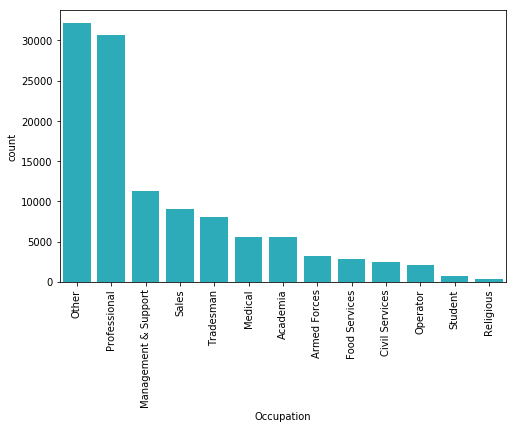

In [76]:
plt.figure(figsize=(8, 5))

ax_13 = sb.countplot(data = prosper, x = 'NewCategory', color = base_color,
                    order = occupation_order)

plt.xticks(rotation = 90)
plt.xlabel('Occupation');

Interpretation: We can see that most borrowers are actually Professionals and Other. We could potentially drill down into how this is related to Borrower APR, but we will be somewhat limited, since so many occupations are listed as Other.

In [77]:
# Variable: EmploymentStatus

prosper['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [78]:
es_order = prosper['EmploymentStatus'].value_counts().index

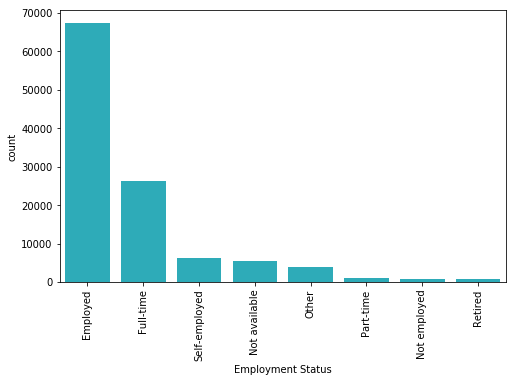

In [79]:
plt.figure(figsize=(8, 5))

ax_14 = sb.countplot(data = prosper, x = 'EmploymentStatus', color = base_color,
                    order = es_order)

plt.xticks(rotation = 90)
plt.xlabel('Employment Status');

Interpretation: Not sure what the difference between Employed, Full-time, and Part-time are. We'll do a quick exploration later, on this categorical type, but note that our analysis is affected by this nuance.

In [80]:
# Variable: IsBorrowerHomeowner

prosper['IsBorrowerHomeowner'].value_counts()

True     57478
False    56434
Name: IsBorrowerHomeowner, dtype: int64

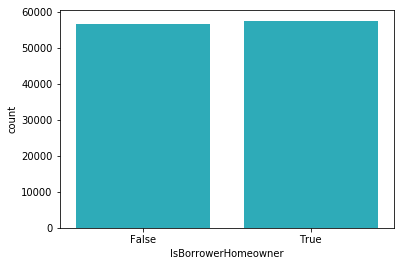

In [81]:
ax_15 = sb.countplot(data = prosper, x = 'IsBorrowerHomeowner', color = base_color);

Interpretation: Roughly half of the borrowers are homeowners. We might be able to see if a borrower gets a better rate if they are.

In [82]:
prosper['CreditRange'].value_counts()

680 - 699    16492
660 - 679    16366
700 - 719    15471
720 - 739    12923
640 - 659    12199
740 - 759     9267
760 - 779     6606
780 - 799     4624
620 - 639     4172
600 - 619     3602
800 - 819     2644
520 - 539     1593
540 - 559     1474
820 - 839     1409
560 - 579     1357
580 - 599     1125
840 - 859      567
500 - 519      554
480 - 499      346
860 - 879      212
460 - 479      141
0 - 19         133
440 - 459       36
880 - 899       27
420 - 439        5
360 - 379        1
Name: CreditRange, dtype: int64

In [83]:
# Variable: CreditRange

credit_order = list(prosper['CreditRange'].value_counts().sort_index().index)

credit_order = credit_order[-1:] + credit_order[:-1]

In [84]:
# Establish the ordering

cr_classes = pd.api.types.CategoricalDtype(ordered = True, categories = credit_order)

prosper['CreditRange'] = prosper['CreditRange'].astype(cr_classes)

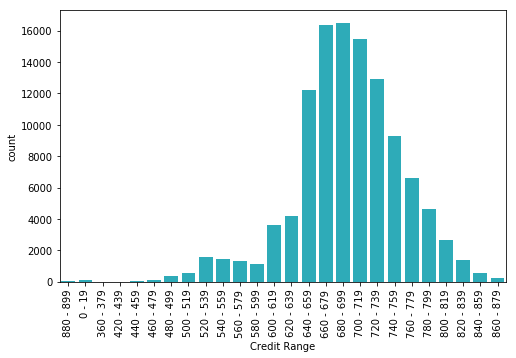

In [85]:
plt.figure(figsize=(8, 5))

ax_16 = sb.countplot(data = prosper, x = 'CreditRange', color = base_color,
                    order = credit_order)

plt.xticks(rotation = 90)
plt.xlabel('Credit Range');

Interpretation: We can see of the loans are within a credit range between 640 and 759. Note that this plot is actually a bar plot with Credit Ranges as the bins (We don't know the actual Credit Scores of each borrower). This plot shows a normal distribution with a mean somewhere between a Credit Score of 660 and 699. We can drill down further into loans at the edges and at the majority (Somewhere between 640 and 759). 

Also interesting is that there is a noticeable amount of loans below the Prosper Recommended Minimum Credit Score of 640 [Ref. 6].

In [86]:
# Variable: IncomeRange

prosper['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7716
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Ordering for Income Range for the subjective categories will be guided by the following rationale:

* $0 at the bottom, because that indicates literally no money coming into the bank account
* Not displayed will be next, because we can't be sure if the borrower is engaged in illicit activities. Their income could be high, or negative.
* Not employed will be next, because they could very likely be either a student or getting unemployment money

In [87]:
ir_order = ['$0', 'Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999',
            '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [88]:
# Establish the ordering in the Prosper dataframe
# We will need these for later on

ir_classes = pd.api.types.CategoricalDtype(ordered = True, categories = ir_order)

prosper['IncomeRange'] = prosper['IncomeRange'].astype(ir_classes)

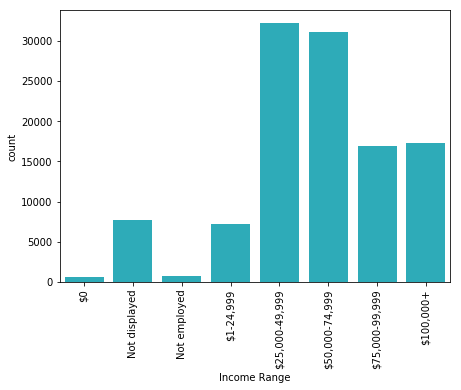

In [89]:
plt.figure(figsize=(7, 5))

ax_17 = sb.countplot(data = prosper, x = 'IncomeRange', color = base_color,
                    order = ir_order)

plt.xticks(rotation = 90)
plt.xlabel('Income Range');

Interpretation: Most loans fall under an Income Range between \\$25,000 and $75,000. With so many loans under the \\$25,000-49,999 range, we can't help but wonder whether predatory lending practices are occurring, given a Poverty Guideline of \\$25,100 for a family unit. 

We can reasonably explore all of the income ranges fro \\$1 to \\$100,000.

In [90]:
#InvestmentFromFriendsCount - Number of friends that invested in a loan
#Investors - Number of Lenders

In [91]:
prosper['DebtToIncomeRatio'].describe()

count    105358.000000
mean          0.275993
std           0.551814
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [92]:
prosper[prosper['DebtToIncomeRatio'].isnull()].shape

(8554, 85)

In [93]:
dtir_bins = np.arange(prosper['DebtToIncomeRatio'].min(), prosper['DebtToIncomeRatio'].max() + 0.025, 0.025)

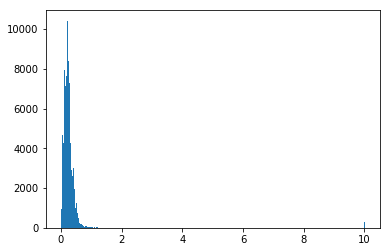

In [94]:
ax_18 = plt.hist(data = prosper[prosper['DebtToIncomeRatio'].isnull() == False], x = 'DebtToIncomeRatio', bins = dtir_bins);

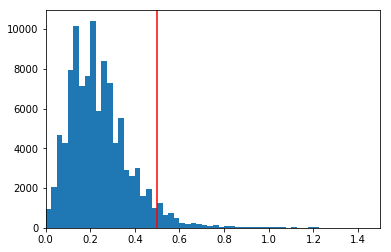

In [95]:
# Looks like we have some outliers, so we'll first try zooming in
# We've marked the suggested maximum Debt to Income Ratio that Prosper accepts

ax_19 = plt.hist(data = prosper[prosper['DebtToIncomeRatio'].isnull() == False], x = 'DebtToIncomeRatio', bins = dtir_bins)

plt.xlim(0, 1.5)
plt.axvline(x = 0.5, color = 'r', linewidth = 1.5);

Interpretation: This distribution is slightly right skewed. The line denotes the maximum suggested Debt to Income Ratio that Prosper accepts. This suggests that these loans are probably going out of control, and the Lender's debt has increased.

In [96]:
np.log10(prosper[prosper['DebtToIncomeRatio'].isnull() == False]['DebtToIncomeRatio'].describe())

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.022668
mean    -0.559103
std     -0.258208
min          -inf
25%     -0.853872
50%     -0.657577
75%     -0.494850
max      1.000434
Name: DebtToIncomeRatio, dtype: float64

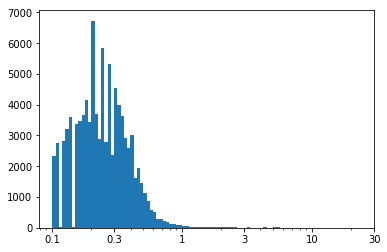

In [97]:
# Try a log transformation, like in class

dtir_bins_2 = 10 ** np.arange(-1, 1 + 0.025, 0.025)
ticks = [0.1, 0.3, 1, 3, 10, 30]
labels = ['{}'.format(v) for v in ticks]

ax_20 = plt.hist(data = prosper[prosper['DebtToIncomeRatio'].isnull() == False], x = 'DebtToIncomeRatio', bins = dtir_bins_2)
plt.xscale('log')
plt.xticks(ticks, labels);

Interpretation: Meh, a log transformation doesn't appear to be as useful as anticipated. It looks like we just have some extreme outliers with a Debt to Income Ratio of 1.

In [98]:
# Variable: InvestmentFromFriendsCount - Number of friends that invested in a loan

prosper['InvestmentFromFriendsCount'].value_counts()

0     111781
1       1835
2        215
3         40
4         15
5          8
9          5
6          4
8          3
7          2
33         1
20         1
15         1
13         1
Name: InvestmentFromFriendsCount, dtype: int64

In [99]:
iffc_order = prosper['InvestmentFromFriendsCount'].value_counts().sort_index().index

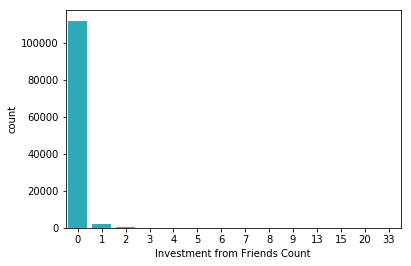

In [100]:
#plt.figure(figsize=(8, 5))

ax_21 = sb.countplot(data = prosper, x = 'InvestmentFromFriendsCount', color = base_color,
                    order = iffc_order)

plt.xlabel('Investment from Friends Count');

Interpretation: This plot just shows that most of the loans did not have investment from friends. However, we could see if having some investments from friends might have an impact on Borrower APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Primary Variables of Interest: 

Qualitative:

* LoanStatus - Most loans are either Current, Completed, Chargedoff, or Defaulted. There are relatively few loans that are past due for a certain number of days. We might be able to see characteristics of loans based on these 4 statuses. 

Quantitative:

* BorrowerAPR - The distribution is somewhat normal, with a mean of 22 %. Most data fall between a Borrower APR of 8.48 % and 35.8 %. There are a few spikes (~ 35 %, 20 %, and 17 %)
* LenderYield - The distribution is relatively normal, with a mean of 18.3 %. Most data fall between a Lender Yield of 6.5 % and 32.0 %. There is a spike at around 31 % and 35 %. 
* EstimatedEffectiveYield - The distribution is less normal, and has a mean at 16.9 %. Most data fall between a Estimated Effective Yield of 5.6 % and 29.2 %. 
* ProsperScore - The distribution looks pretty centered around a Prosper Score of 6. Most data fall between a range of 4 and 8. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Unusual Distributions:

* Borrower APR, Lender Yield, Estimated Effective Yield - Although all three variables show normal distributions, each one has at least one peak above the mean. 

* The Prosper Score was probably the most unusual. Although it is a normal distribution, given a recommended minimum Credit Score of 640, we would have expected the distribution to look more left skewed, with most of the data falling at least above a Prosper Score Median of 6. Instead, we see a substantial number of loans occuring below the median. 

* The Borrower State variable is significantly skewed towards California, with more than double the amount of loans than the amount originating from any other state. This could probably be accounted for because Prosper is headquartered in California. 

* The Income Range shows a surprising distribution. Most loans are occurring for lenders with income ranges in \\$25,000-49,999 and \\$50,000-74,999. Although a substantial number of loans are for Debt Consolidation, we can only hope that this is in fact helping the borrowers with income below \\$50,000. 

* The Debt To Income Ratio is slightly skewed right. Ref. 11 suggests that with a maximum Debt to Income Ratio of 0.5, we should see too much data above it. This suggests that these are the loans that are going out of control. 

Operations (Tidy, adjust, or changing the form of the data):

* We created a Credit Range variable based on the CreditScoreRangeLower and CreditScoreRangeUpper. We did this to create bins for each loan, because each value represented a Credit Score lower and upper bound, instead of the actual score. 

* We dropped rows for null values in the BorrowerAPR column, because that is a primary variable of interest. Additionally, all of the loans that show a null value in the BorrowerAPR column show up as Completed. 

* For EstimatedEffectiveYield and DebtToIncomeRatio, we just zoomed in on the main data points. This is because a log scale plot of the data did not show us anything we couldn't determine from a histogram generated from the data. 

* For DebtToIncomeRatio, we just plotted the values that were not Null.

* Lastly, we tried combining CreditGrade and ProsperRating (Alpha) to maintain continuity across 2009 (EitherScore column). However, because individual CreditGrade and ProsperRating (Alpha) histograms looked relatively similar (Most loans occurring with at least between a D and A rating), we will not continue with analyzing the a continuous CreditGrade/ProsperRating (Alpha) metric. 

## Bivariate Exploration

# Primary Variables

Recap of variables listed here so we don't have to scroll as much

Qualitative:

* LoanStatus

Quantitative:

* BorrowerAPR
* LenderYield
* EstimatedEffectiveYield
* ProsperScore

In [101]:
prosper['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [102]:
# Establish the ordering of the LoanStatus
# We'll change the order for this plot in order of most distasteful (Best to worst) status

ls_order = ['Cancelled', 'Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)',
            'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
            'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff']
lclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ls_order)
prosper['LoanStatus'] = prosper['LoanStatus'].astype(lclasses)

#### BorrowerAPR vs LoanStatus

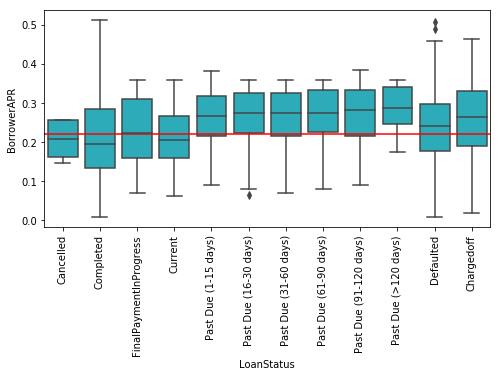

In [103]:
fig = plt.figure(figsize = (8, 4))

ax_22 = sb.boxplot(data = prosper, x = 'LoanStatus', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

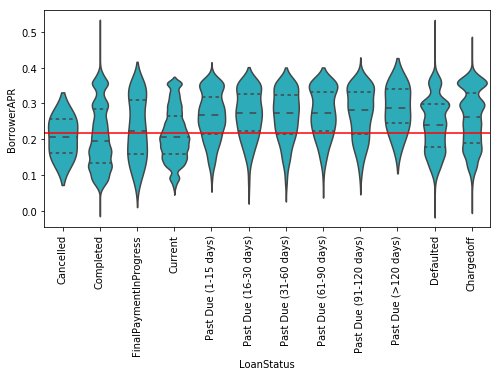

In [104]:
# Try violin plots

fig = plt.figure(figsize = (8, 4))

ax_23 = sb.violinplot(data = prosper, x = 'LoanStatus', y = 'BorrowerAPR',
           color = base_color, inner = 'quartile')

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: It looks like the Borrower APR is higher for loans, as we get later and later in payments past due. Most loans that have been Defaulted or Charged-off are at approximately 26 - 28 % Borrower APR, and are noticeably lower than the Borrower APRs for loans with a status of Past Due (> 120 days). 

Another interesting feature is that for loans that are Defaulted or Charged-off, the distribution dips below 10 % Borrower APR, which is well below the average Prosper APR (22 %). 

#### BorrowerAPR vs LoanStatus (Post-2009 only)
#### ProsperScore vs LoanStatus (Post-2009 only)

We'll do this only for a certain time frame in this plot set, to compare data on the same basis.

In [105]:
# We filter based on whether a row has a Prosper Score, because we're not sure whether the Prosper
# Score started during year 2009, or the year after

prosper_subset = prosper[prosper['ProsperScore'].isnull() == False]

In [106]:
ps_mean = prosper_subset['ProsperScore'].mean()
APR_post2009 = prosper_subset['BorrowerAPR'].mean()

print('Mean Prosper Score: {:.2f}'.format(ps_mean))
print('Mean Borrower APR (For Post-2009 only): {:.4f}'.format(APR_post2009))

Mean Prosper Score: 5.95
Mean Borrower APR (For Post-2009 only): 0.2267


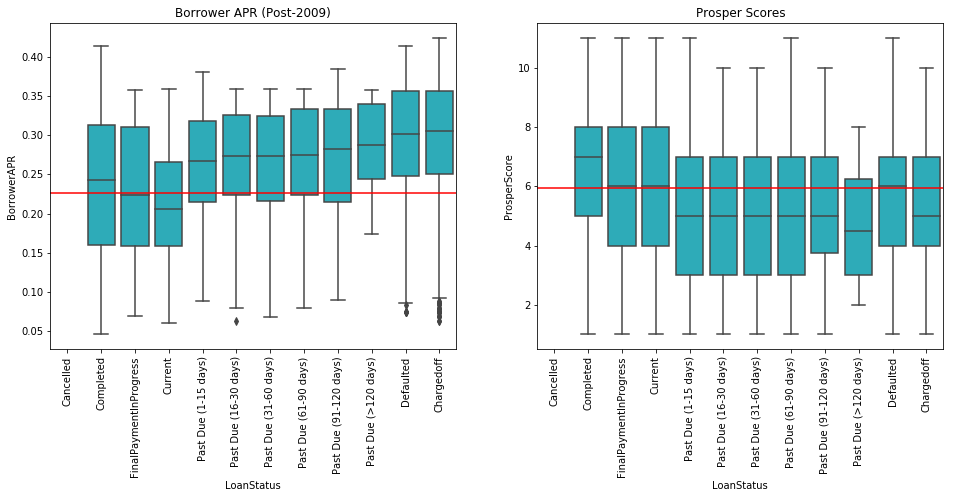

In [107]:
# Borrower APR vs Loan Status and Prosper Score vs Loan Status

fig = plt.figure(figsize = (16, 6))

ax_24 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'LoanStatus', y = 'BorrowerAPR',
           color = base_color)
plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR (Post-2009)')

ax_25 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'LoanStatus', y = 'ProsperScore',
           color = base_color)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Scores');

Interpretation: These two plots show that loans that past due are associated with higher Borrower APRs, and a Prosper Score of 5 or below. Also noteworthy is that Defaulted Loans have a mean Prosper Score of 6.

One interesting feature is that for most Loan Statuses, the error bars span almost the entire range. This means that we have borrowers associated with a high Prosper Score that have Defaulted or Chargedoff loans. A closer look at the Defaulted and Chargedoff statuses with high Prosper Scores (9 or greater) shows that this is a small portion of the data. While it is a small subset, this is still surprising.

In [108]:
prosper_subset[(prosper_subset['ProsperScore'] >= 9) & (prosper_subset['LoanStatus'] == 'Defaulted')].shape

(92, 85)

In [109]:
prosper_subset[(prosper_subset['ProsperScore'] >= 9) & (prosper_subset['LoanStatus'] == 'Chargedoff')].shape

(366, 85)

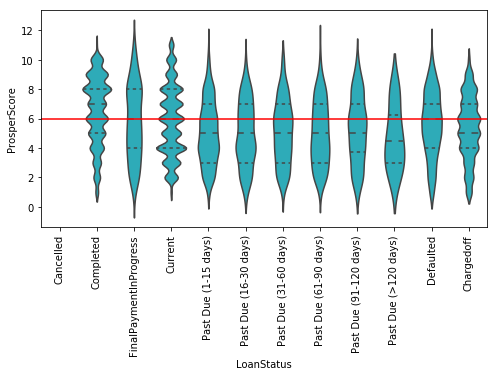

In [110]:
# Try violin plots for ProsperScore
# Since the ProsperScore is a discrete variable (Effectively a categorical type), we probably
# shouldn't try to interpret a histogram type of distribution of the data. 

fig = plt.figure(figsize = (8, 4))

ax_26 = sb.violinplot(data = prosper, x = 'LoanStatus', y = 'ProsperScore',
           color = base_color, inner = 'quartile')

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

Interpretation: We can see similar distributions compared with the box plot, and a number of peaks in the distribution for Current loans.

#### LenderYield vs LoanStatus (All years)

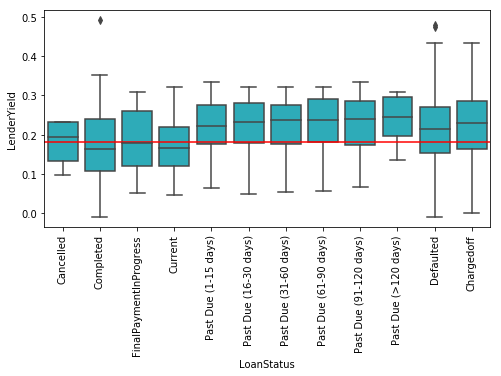

In [111]:
fig = plt.figure(figsize = (8, 4))

ax_27 = sb.boxplot(data = prosper, x = 'LoanStatus', y = 'LenderYield',
           color = base_color)

plt.axhline(y = mean_yield, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

Interpretation: Nothing really jumps out at us, beyond what we determined from the Borrower APR plot. There are a few outliers in the Defaulted category are interestingly high yields. In general, the Lender Yield appears to increase up until the loan defaults. 

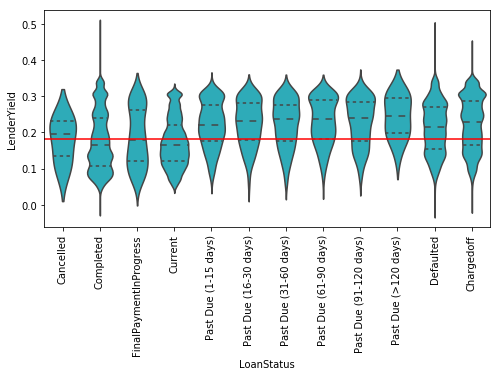

In [112]:
# Try violin plots

fig = plt.figure(figsize = (8, 4))

ax_28 = sb.violinplot(data = prosper, x = 'LoanStatus', y = 'LenderYield',
           color = base_color, inner = 'quartile')

plt.axhline(y = mean_yield, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

In [113]:
# We'll just confirm that the LenderYield and Prosper Score plots show similar results as
# the BorrowerAPR vs LoanStatus variables

ly_post2009 = prosper_subset['LenderYield'].mean()

print('Mean Lender Yield (For Post-2009 only): {:.4f}'.format(ly_post2009))

Mean Lender Yield (For Post-2009 only): 0.1860


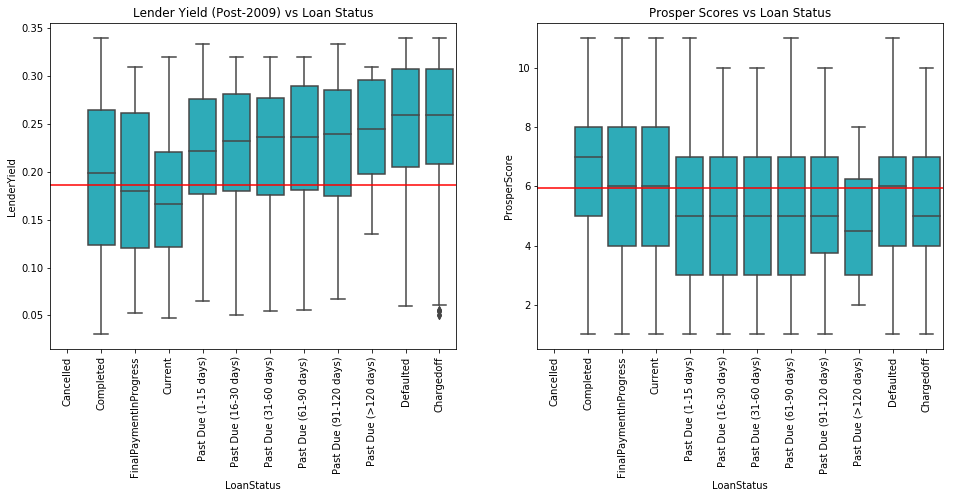

In [114]:
fig = plt.figure(figsize = (16, 6))

ax_29 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'LoanStatus', y = 'LenderYield',
           color = base_color)
plt.axhline(y = ly_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Lender Yield (Post-2009) vs Loan Status')

ax_30 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'LoanStatus', y = 'ProsperScore',
           color = base_color)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Scores vs Loan Status');

Interpretation: Both box and violin plots show similar trends. We can see Lender Yield go up for the loans, as the time the a payment is past due increases. The Lender Yield is lower for both Defaulted and Chargedoff loans compared to loans with a status of Past Due (> 120 days).

#### EstimatedEffectiveYield vs LoanStatus

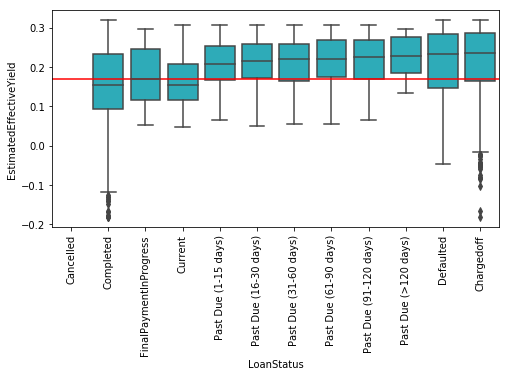

In [115]:
fig = plt.figure(figsize = (8, 4))

ax_31 = sb.boxplot(data = prosper, x = 'LoanStatus', y = 'EstimatedEffectiveYield',
           color = base_color)

plt.axhline(y = mean_eey, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

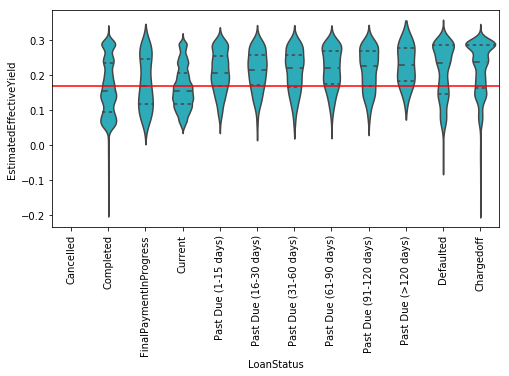

In [116]:
# Try violin plots

fig = plt.figure(figsize = (8, 4))

ax_32 = sb.violinplot(data = prosper, x = 'LoanStatus', y = 'EstimatedEffectiveYield',
           color = base_color, inner = 'quartile')

plt.axhline(y = mean_eey, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

Interpretation: These plots show a lot of outliers for Defaulted and Chargedoff loans, and Completed loans. These make sense, because when a loan defaults or gets chargedoff, we can expect the lender to effectively lose money.

Since these three plots look similar, and show similar trends against Loan Status, we will mainly focus on Borrower APR.

#### Borrower APR vs Prosper Score

C:\Users\MichaelWei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


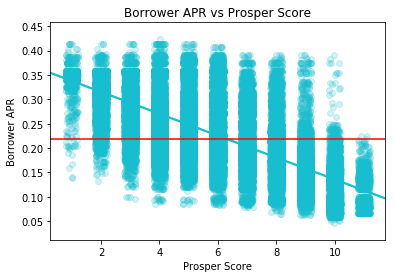

In [117]:
ax_33 = sb.regplot(data = prosper, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color, 
                   x_jitter = 0.2, scatter_kws = {'alpha': 0.2})

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs Prosper Score');

In [118]:
prosper[['BorrowerAPR', 'ProsperScore']].corr(method = 'pearson')

,BorrowerAPR,ProsperScore
BorrowerAPR,1.000000,-0.668287
ProsperScore,-0.668287,1.000000


Interpretation: The range of Borrower APRs is huge for each possible Prosper Score. Not really a friendly plot. However, we see that the correlation is actually moderately negatively correlated, based on the Pearson correlation coefficient.

## Secondary Variables

* Term - We'll skip this one, because we know that most of the loans are 36 month loans, with some 60 month loans
* CreditGrade (Pre-2009 only)
* ProsperRating (Alpha) 
* CreditRating 
* ListingCategory (numeric)
* BorrowerState
* Occupation
* EmploymentStatus
* IsBorrowerHomeowner
* CreditRange
* IncomeRange
* DebtToIncomeRatio
* TotalProsperPaymentsBilled
* InvestmentFromFriendsCount
* Investors

#### BorrowerAPR vs CreditGrade and BorrowerAPR vs ProsperRating (Alpha)

We will look at these categories side-by-side

In [119]:
# Establish the ordering, from Worst to Best. NC will be on the left side, and be considered a 'Neutral' rating

gclasses = pd.api.types.CategoricalDtype(ordered = True, categories = cg_order)
prosper['CreditGrade'] = prosper['CreditGrade'].astype(gclasses)
prosper['ProsperRating (Alpha)'] = prosper['ProsperRating (Alpha)'].astype(gclasses)
prosper['CreditRating'] = prosper['CreditRating'].astype(gclasses)

In [120]:
meanAPR_pre2009 = prosper[prosper['CreditGrade'].isnull() == False]['BorrowerAPR'].mean()

print('Mean Borrower APR (Pre-2009): {:.4f}'.format(meanAPR_pre2009))

Mean Borrower APR (Pre-2009): 0.1960


In [121]:
meanAPR_post2009 = prosper[prosper['ProsperRating (Alpha)'].isnull() == False]['BorrowerAPR'].mean()

print('Mean Borrower APR (Post-2009): {:.4f}'.format(meanAPR_post2009))

Mean Borrower APR (Post-2009): 0.2267


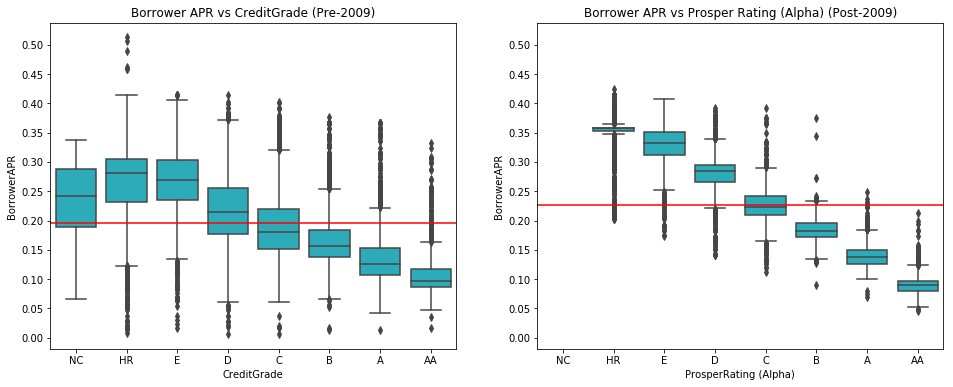

In [122]:
# BorrowerAPR vs CreditGrade and BorrowerAPR vs ProsperRating (Alpha)

y_ticks = np.arange(0, 0.5 + 0.05, 0.05)
y_labels = ['{:.2f}'.format(v) for v in y_ticks]

fig = plt.figure(figsize = (16, 6))

ax_34 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper, x = 'CreditGrade', y = 'BorrowerAPR',
           color = base_color)
plt.yticks(y_ticks, y_labels)
plt.axhline(y = meanAPR_pre2009, color = 'r', linewidth = 1.5)
plt.title('Borrower APR vs CreditGrade (Pre-2009)')

ax_35 = fig.add_subplot(1, 2, 2, sharey = ax_34)
sb.boxplot(data = prosper, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',
           color = base_color)
plt.yticks(y_ticks, y_labels)
plt.axhline(y = meanAPR_post2009, color = 'r', linewidth = 1.5)
plt.title('Borrower APR vs Prosper Rating (Alpha) (Post-2009)');

Interpretation: Overall, most of the distributions make sense for both Credit Grade and Prosper Rating (Alpha). This is because the Borrower APR should decrease noticeably with a higher credit rating. 

However, one interesting trait is the number of outliers in the HR, B, A, and AA Credit Grades. Typically for a loan, we would expect bad credit to be associated with high Borrower APR and good credit to be associated with low Borrower APR. The box plots show a substantial number of loans with bad credit (HR)/Low Borrower APR and a substantial number of loans with good credit (B, A, AA)/High Borrower APR. 

Across the two plots, it looks like after 2009, Borrower APR went up a lot for the borrowers with bad credit (HR, E, and D). 

We plotted the mean Borrower APR for time periods before and after 2009 and made each y-scale the same for both plots so that we could get a better sense of what the data looks like. We can see that the mean Borrower APR went up overall, and that after 2009, Borrower APRs went up for any loan with a credit rating of C or below.

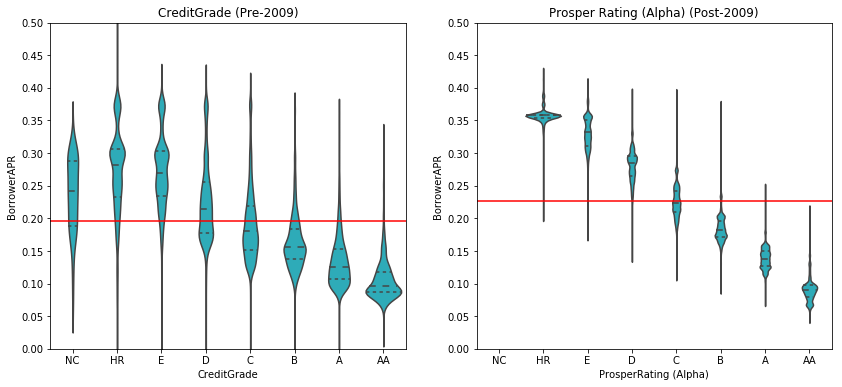

In [123]:
# Try violin plots
# This one is zoomed in a bit, because we can't really get much value from looking at the tips of
# the violins

fig = plt.figure(figsize = (14, 6))

ax_36 = plt.subplot(1, 2, 1)
sb.violinplot(data = prosper, x = 'CreditGrade', y = 'BorrowerAPR',
           color = base_color, inner = 'quartile')
plt.yticks(ticks, y_labels)
plt.axhline(y = meanAPR_pre2009, color = 'r', linewidth = 1.5)
plt.ylim(0, 0.5)
plt.title('CreditGrade (Pre-2009)')

ax_37 = fig.add_subplot(1, 2, 2, sharey = ax_36)
sb.violinplot(data = prosper, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',
              color = base_color, inner = 'quartile')
plt.yticks(y_ticks, y_labels)
plt.axhline(y = meanAPR_post2009, color = 'r', linewidth = 1.5)
plt.ylim(0, 0.5)
plt.title('Prosper Rating (Alpha) (Post-2009)');

Interpretation: These show the same trends as the box plots above.

In [124]:
# Check how many data points we have for CreditGrade and ProsperRating (Alpha)
# Not sure why the CreditGrade plot has bigger violins

prosper[['CreditGrade', 'ProsperRating (Alpha)']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 2 columns):
CreditGrade              28928 non-null category
ProsperRating (Alpha)    84853 non-null category
dtypes: category(2)
memory usage: 6.1 MB


#### BorrowerAPR vs CreditRating (Rating from either CreditGrade or ProsperRating (Alpha))

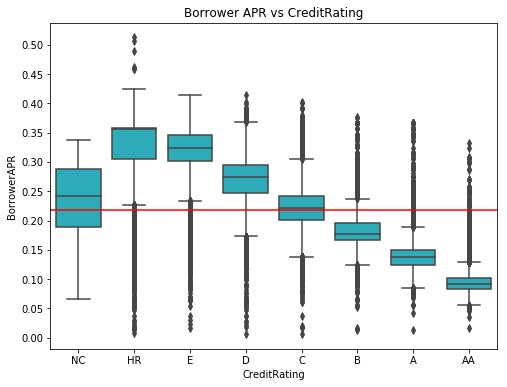

In [125]:
fig = plt.figure(figsize = (8, 6))

ax_38 = sb.boxplot(data = prosper, x = 'CreditRating', y = 'BorrowerAPR',
           color = base_color)
plt.yticks(y_ticks, y_labels)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.title('Borrower APR vs CreditRating');

Interpretation: This tells us the same thing as either CreditGrade or ProsperRating (Alpha) plots. We'll analyze the CreditRating variable to get an overall sense of the loan data. A Credit Rating of C is right where we see a transition from high Borrower APR to low Borrower APR.

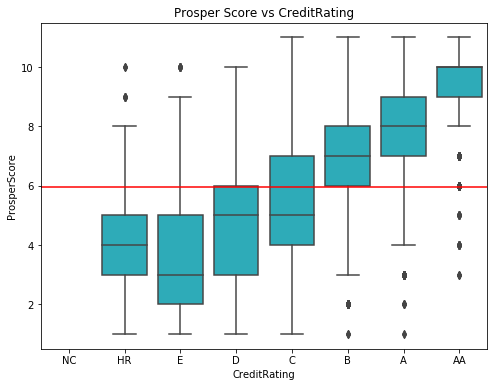

In [126]:
fig = plt.figure(figsize = (8, 6))

ax_39 = sb.boxplot(data = prosper, x = 'CreditRating', y = 'ProsperScore',
           color = base_color)
#plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.title('Prosper Score vs CreditRating')
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5);

#### ListingCategory (numeric)

See what types of loans are most prevalent.

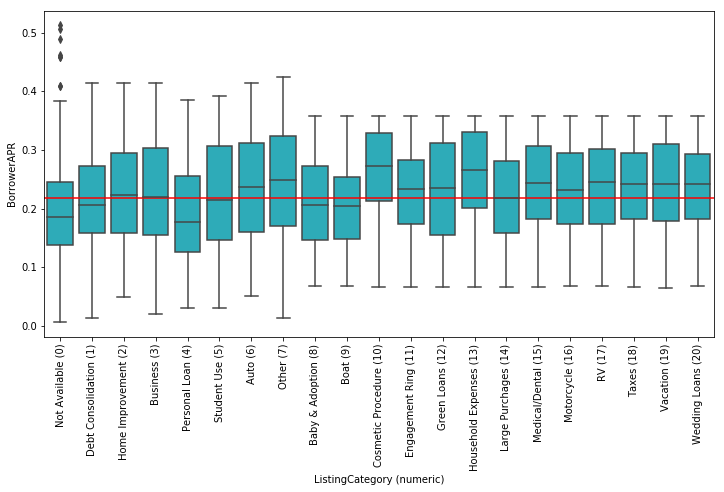

In [127]:
fig = plt.figure(figsize = (12, 6))

ax_40 = sb.boxplot(data = prosper, x = 'ListingCategory (numeric)', 
                     y = 'BorrowerAPR', order = lc_order, color = base_color)

ax_40.set_xticklabels(lc_ticks)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

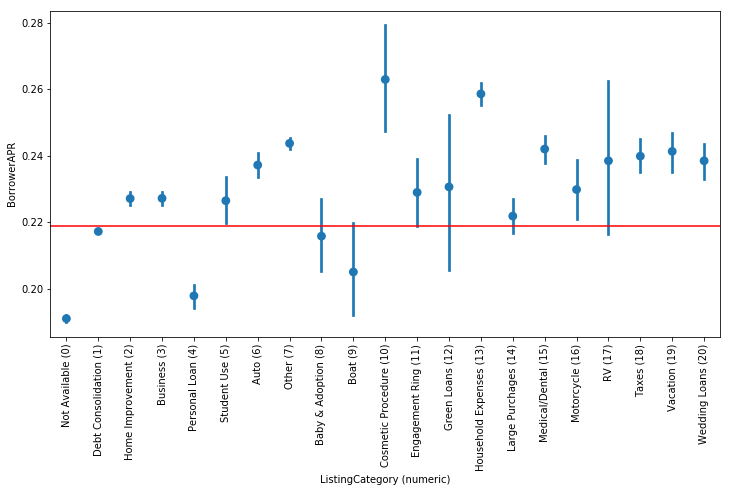

In [128]:
fig = plt.figure(figsize = (12, 6))

ax_41 = sb.pointplot(data = prosper, x = 'ListingCategory (numeric)', 
                     y = 'BorrowerAPR', linestyles = '', order = lc_order)

ax_41.set_xticklabels(lc_ticks)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

In [129]:
prosper['ListingCategory (numeric)'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

Interpretation: The categories for 0, 4, and 9 (Not Available, Personal Loan, and Boat) have the lowest Borrower APR, while the categories for 10 and 13 (Cosmetic and Household Expenses) have the highest borrower APR. 

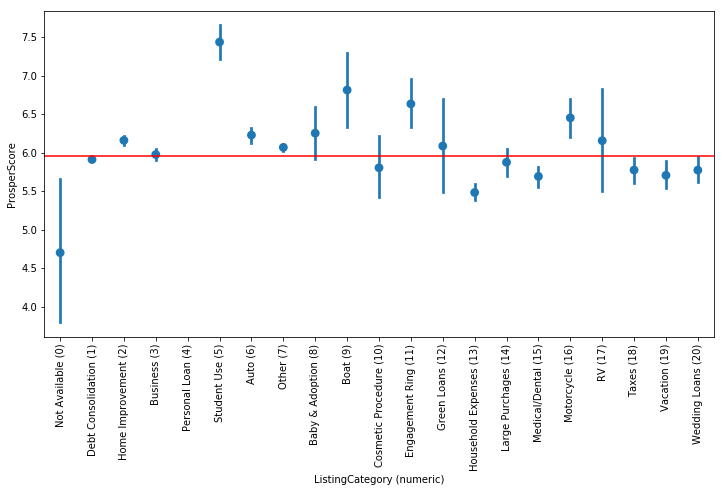

In [130]:
fig = plt.figure(figsize = (12, 6))

ax_42 = sb.pointplot(data = prosper, x = 'ListingCategory (numeric)', 
                     y = 'ProsperScore', linestyles = '', order = lc_order)

ax_42.set_xticklabels(lc_ticks)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: Most loans have an average Prosper Score around 6. For loans falling under the 0 - Not Available category, the average Prosper Score is closer to 4.5. This suggests that a loan will drop at least a point in the Prosper Score if a loan cannot be categorized.

In [131]:
prosper['ListingCategory (numeric)'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

#### BorrowerAPR vs BorrowerState

We will opt for line plots, because box plots and violin plots will get crowded with 50 states. We will retain the same order as the countplots above, which is based on how many loans originated from each state from highest to lowest.

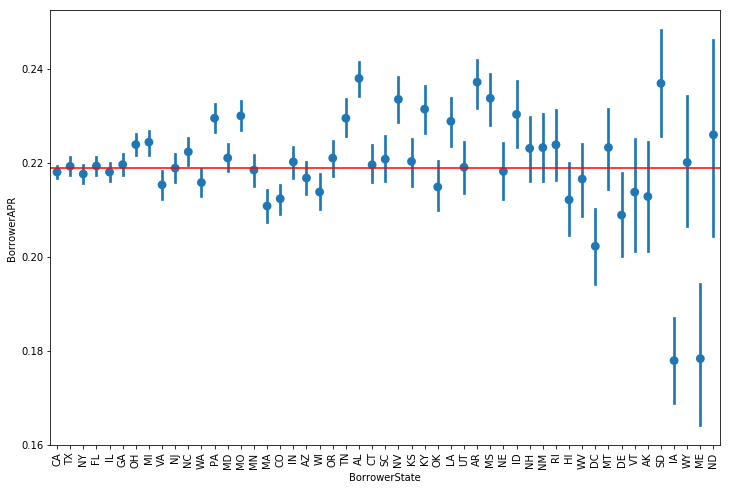

In [132]:
fig = plt.figure(figsize = (12, 8))

ax_43 = sb.pointplot(data = prosper, x = 'BorrowerState', y = 'BorrowerAPR', order = bs_order,
                     linestyles = '')

plt.xticks(rotation = 90)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5);

Interpretation: This really just tells us the two states where we might expect the lowest Borrower APR (IA and ME), and the three states with the highest Borrower APR (AL, AR, and SD)

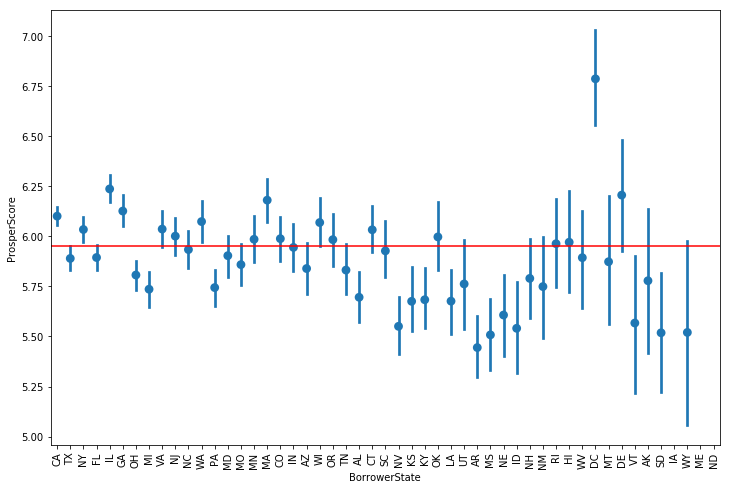

In [133]:
fig = plt.figure(figsize = (12, 8))

ax_44 = sb.pointplot(data = prosper, x = 'BorrowerState', y = 'ProsperScore', order = bs_order,
                     linestyles = '')

plt.xticks(rotation = 90)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5);

Interpretation: DC has a noticeably higher Prosper Score (Prosper's Algorithm must think that a politician is relatively trustworthy...). We can also see a corresponding Borrower APR for DC that is below the overall mean. This plot has a noticeably opposite trend as compared to the Borrower APR vs Borrower State plot. 

#### Borrower Occupation

In [134]:
prosper['NewCategory'].value_counts()

Other                   32180
Professional            30675
Management & Support    11283
Sales                    9025
Tradesman                8017
Medical                  5553
Academia                 5546
Armed Forces             3196
Food Services            2798
Civil Services           2506
Operator                 2114
Student                   699
Religious                 320
Name: NewCategory, dtype: int64

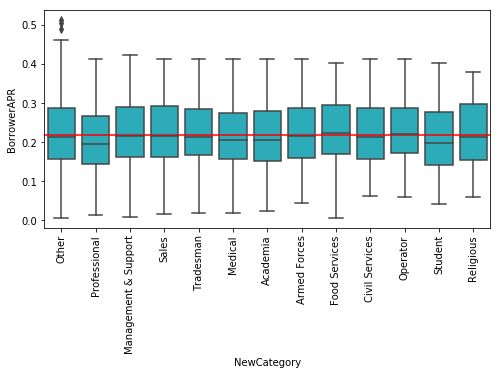

In [135]:
fig = plt.figure(figsize = (8, 4))

ax_45 = sb.boxplot(data = prosper, x = 'NewCategory', y = 'BorrowerAPR',
           color = base_color, order = occupation_order)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

Interpretation: It looks like Professionals and Students consistently get lower Borrower APRs than the other occupations. 

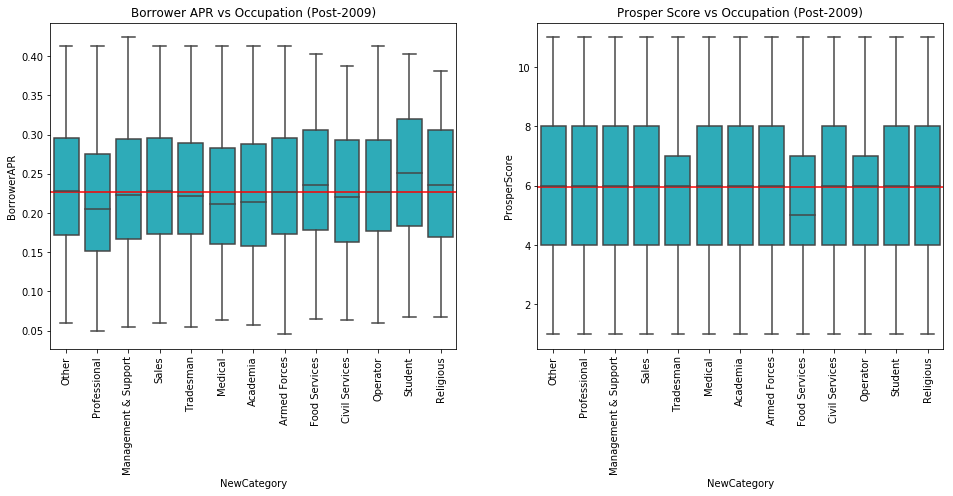

In [136]:
# Check a side-by-side comparison of BorrowerAPR and Prosper Score with Occupation

fig = plt.figure(figsize = (16, 6))

ax_46 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'NewCategory', y = 'BorrowerAPR',
           color = base_color, order = occupation_order)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR vs Occupation (Post-2009)')

ax_47 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'NewCategory', y = 'ProsperScore',
           color = base_color, order = occupation_order)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Score vs Occupation (Post-2009)');

Interpretation: Based on this data, we can see that most Occupation categories are associated with Prosper Scores close to the mean. After 2009, Students appear to be associated with higher Borrower APR.

The Food Services occupation is associated with a comparatively lower Prosper Score and higher Borrower APR with respect to the averages.

#### BorrowerAPR vs EmploymentStatus

In [137]:
prosper['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

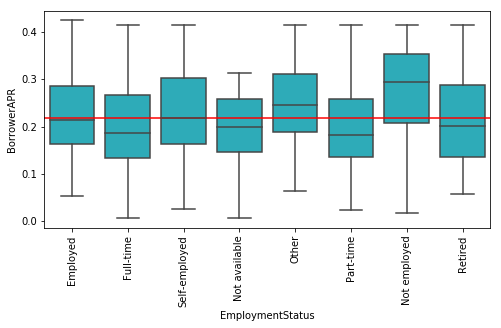

In [138]:
# BorrowerAPR vs EmploymentStatus

fig = plt.figure(figsize = (8, 4))

ax_48 = sb.boxplot(data = prosper, x = 'EmploymentStatus', y = 'BorrowerAPR',
                   color = base_color, order = es_order)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

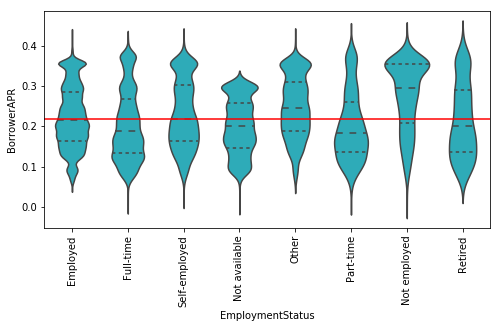

In [139]:
# Try violin plots

fig = plt.figure(figsize = (8, 4))

ax_49 = sb.violinplot(data = prosper, x = 'EmploymentStatus', y = 'BorrowerAPR',
                   color = base_color, inner = 'quartile', order = es_order)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: Both plots show that a borrower that is Employed is likely to obtain a Borrower APR close to the average Borrower APR, which makes sense, because that category makes up the bulk of the data. Note that this data set distinguishes between Employed, Full-time, and Part-time employees.

We can also see from these plots that most lenders identifying as "Not employed" have consistently higher Borrower APRs (~ 30 %). Most other Employment Statuses show means around 20 %. 

One interesting feature is that Retired lenders don't appear to get any higher or lower Borrower APRs, which suggests that Retired lenders aren't necessarily discriminated against and seen as higher credit risks. At the same time, Retired lenders are also not given better interest rates due to advanced age (i.e. no senior citizen discounts there).

#### BorrowerAPR vs EmploymentStatus (Post-2009)

#### ProsperScore vs EmploymentStatus (Post-2009)

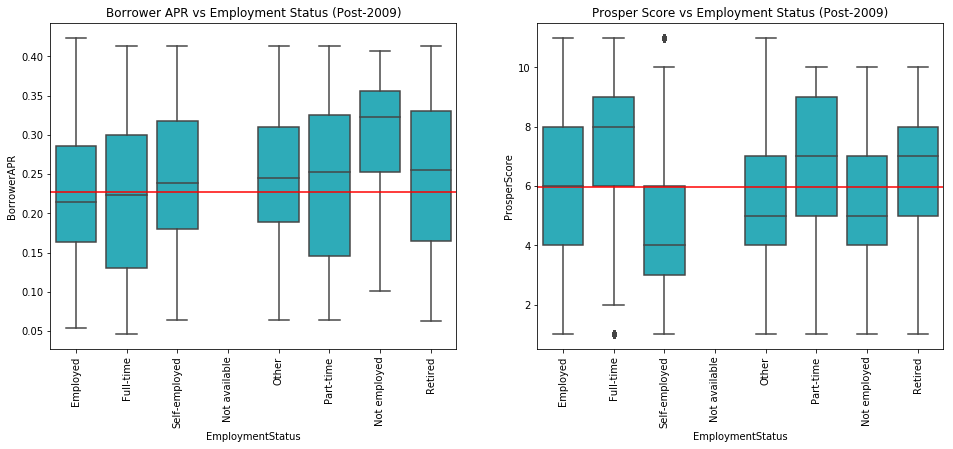

In [140]:
fig = plt.figure(figsize = (16, 6))

ax_50 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'EmploymentStatus', y = 'BorrowerAPR',
           color = base_color, order = es_order)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR vs Employment Status (Post-2009)')

ax_51 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'EmploymentStatus', y = 'ProsperScore',
           color = base_color, order = es_order)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Score vs Employment Status (Post-2009)');

Interpretation: These plots suggest general trends for what could be a starting point for further analysis (e.g. "Employed" borrowers - average Prosper Score, slightly lower Borrower APR, "Other" borrowers - lower than average Prosper Score, higher Borrower APR, etc.). 

These plots show that a borrower that is "Not employed" is associated with a Prosper Score that is below the average and much higher Borrower APR. Interestingly enough, a borrower that is "Self-employed" shows the lowest Prosper Score, but a Borrower APR that is closer to the average.

#### BorrowerAPR vs IsBorrowerHomeowner

Check if there is a propensity towards higher or lower Borrower APR based on whether the borrower is a homeowner.

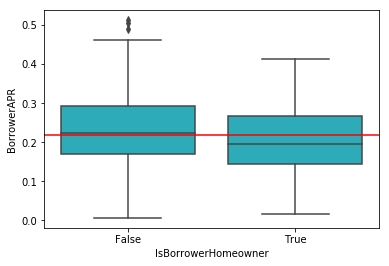

In [141]:
ax_52 = sb.boxplot(data = prosper, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5);

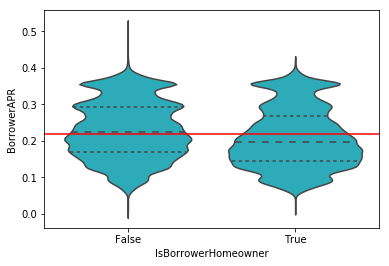

In [142]:
# Try violin plots

ax_53 = sb.violinplot(data = prosper, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',
                   color = base_color, inner = 'quartile')
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5);

Interpretation: We can see from these two plots, that a homeowner is more likely to be associated with a lower Borrower APR compared to non-homeowners. This subset of borrowers has more data below the overall average Borrower APR. These borrowers might be associated with a lower risk.

#### BorrowerAPR vs IsBorrowerHomeowner (Post-2009)

#### ProsperScore vs IsBorrowerHomeowner (Post-2009)

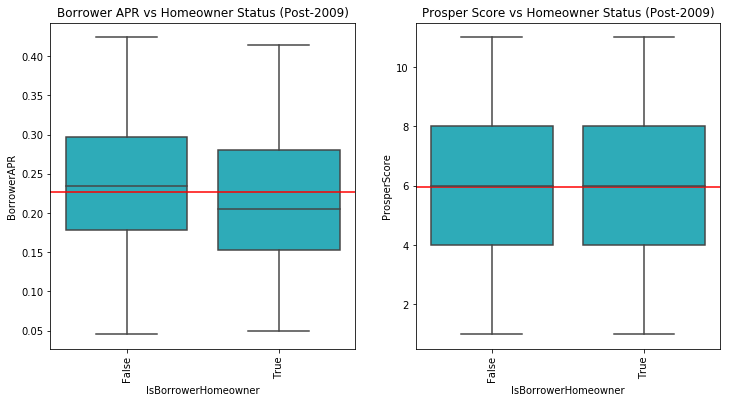

In [143]:
fig = plt.figure(figsize = (12, 6))

ax_54 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR vs Homeowner Status (Post-2009)')

ax_55 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'IsBorrowerHomeowner', y = 'ProsperScore',
           color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Score vs Homeowner Status (Post-2009)');

In [144]:
prosper_subset['IsBorrowerHomeowner'].value_counts()

True     44848
False    40005
Name: IsBorrowerHomeowner, dtype: int64

Interpretation: These plots suggest that a homeowner is more likely to be associated with a lower Borrower APR, especially since the average Prosper Score between Homeowners versus non-Homeowners is equal.

### Borrower APR vs Credit Range

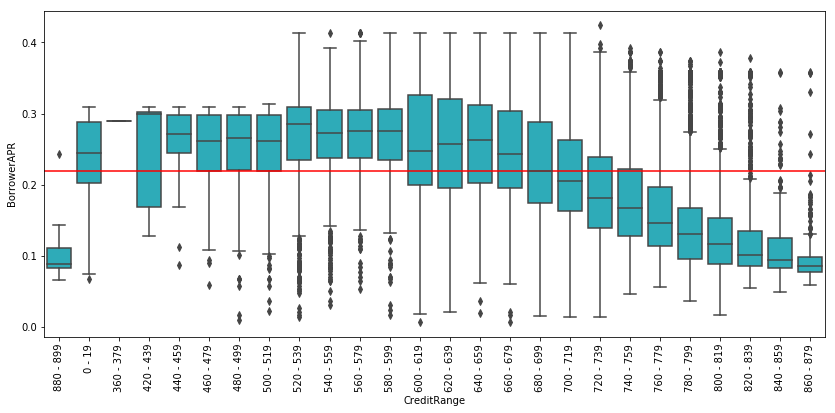

In [145]:
# Borrower APR vs CreditRange

fig = plt.figure(figsize = (14, 6))

ax_56 = sb.boxplot(data = prosper, x = 'CreditRange', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

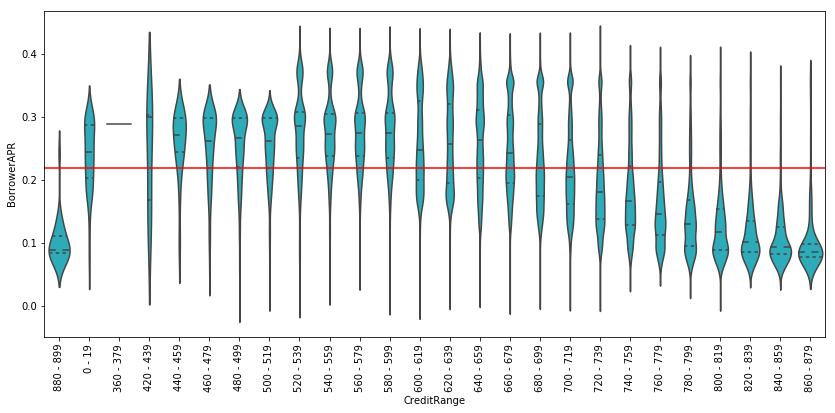

In [146]:
# Try violin plots

fig = plt.figure(figsize = (14, 6))

ax_57 = sb.violinplot(data = prosper, x = 'CreditRange', y = 'BorrowerAPR',
                   color = base_color, inner = 'quartile')

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

In [147]:
# Check the amount of data in the outlier ranges

low_cr = ['500.0 - 519.0', '520.0 - 539.0', '540.0 - 559.0', '560.0 - 579.0', '580.0 - 599.0']
high_cr = ['740.0 - 759.0', '760.0 - 779.0', '780.0 - 799.0', '800.0 - 819.0', '820.0 - 839.0',
           '840.0 - 859.0', '860.0 - 879.0']

prosper[(prosper['CreditRange'].isin(low_cr)) & (prosper['BorrowerAPR'] < 0.15)].shape

(0, 85)

In [148]:
prosper[(prosper['CreditRange'].isin(high_cr)) & (prosper['BorrowerAPR'] > 0.25)].shape

(0, 85)

Interpretation: We can see quite noticeably, that borrowers that fall below a Credit Range of 680 - 699 will probably be associated with a Borrower APR that is above the overall mean. 

The box plot looks like there are a lot of high outliers in the Credit Ranges between 760 and 880, and low outliers in the Credit Ranges between 500 and 600. However, this makes up a relatively small amount of the data 

#### BorrowerAPR vs CreditRange (Post-2009)

#### ProsperScore vs CreditRange (Post-2009)

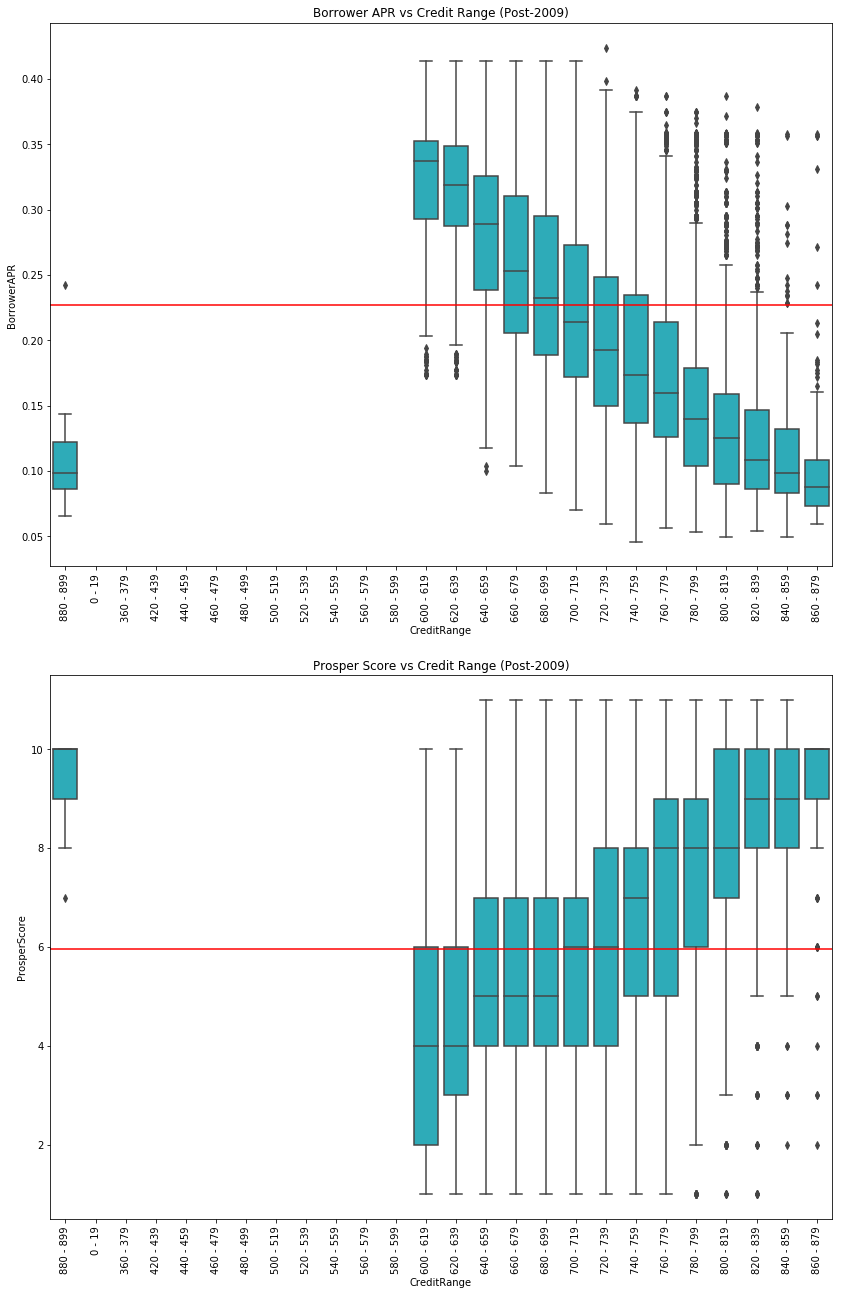

In [149]:
fig = plt.figure(figsize = (14, 22))

ax_58 = plt.subplot(2, 1, 1)
sb.boxplot(data = prosper_subset, x = 'CreditRange', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR vs Credit Range (Post-2009)')

ax_59 = plt.subplot(2, 1, 2)
sb.boxplot(data = prosper_subset, x = 'CreditRange', y = 'ProsperScore',
           color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Score vs Credit Range (Post-2009)');

In [150]:
prosper_subset['CreditRange'].value_counts()

660 - 679    14133
680 - 699    14019
700 - 719    13610
720 - 739    11034
640 - 659     8849
740 - 759     7871
760 - 779     5253
780 - 799     3705
800 - 819     2107
620 - 639     1653
820 - 839     1042
600 - 619     1040
840 - 859      398
860 - 879      122
880 - 899       17
580 - 599        0
560 - 579        0
540 - 559        0
520 - 539        0
500 - 519        0
480 - 499        0
460 - 479        0
440 - 459        0
420 - 439        0
360 - 379        0
0 - 19           0
Name: CreditRange, dtype: int64

Interpretation: These plots show how Borrower Rate tends to decrease with increasing Credit Range, while Prosper Score tends to increase with increasing Credit Range.

Interesting how there are no credit scores below 600 after 2009, which is confirmed by looking at the value_counts. 

#### Borrower APR vs IncomeRange

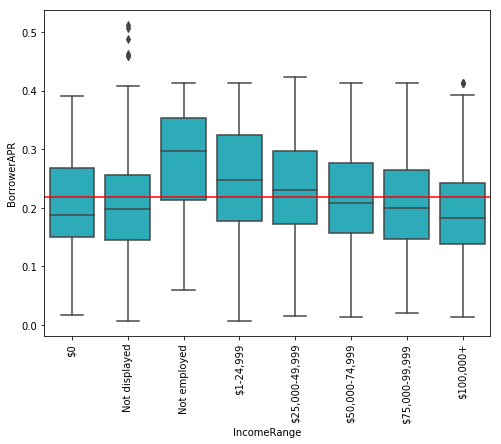

In [151]:
fig = plt.figure(figsize = (8, 6))

ax_60 = sb.boxplot(data = prosper, x = 'IncomeRange', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

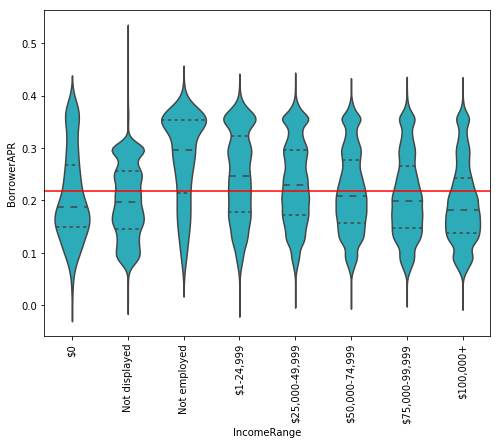

In [152]:
fig = plt.figure(figsize = (8, 6))

ax_61 = sb.violinplot(data = prosper, x = 'IncomeRange', y = 'BorrowerAPR',
                   color = base_color, inner = 'quartile')

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

In [153]:
prosper[prosper['IncomeRange'] == '$0'].shape

(621, 85)

In [154]:
# Check the various professions for borrowers that report $0 as their income

prosper[prosper['IncomeRange'] == '$0']['NewCategory'].value_counts()

Other                   281
Professional             90
Sales                    81
Tradesman                46
Management & Support     40
Student                  30
Food Services            22
Academia                 19
Medical                   8
Armed Forces              1
Civil Services            1
Religious                 1
Operator                  1
Name: NewCategory, dtype: int64

In [155]:
# Check Not Displayed

prosper[prosper['IncomeRange'] == 'Not displayed']['NewCategory'].value_counts()

Other                   3813
Professional            1381
Management & Support     678
Sales                    567
Tradesman                344
Academia                 208
Medical                  159
Armed Forces             154
Student                  126
Food Services            105
Civil Services            91
Operator                  74
Religious                 16
Name: NewCategory, dtype: int64

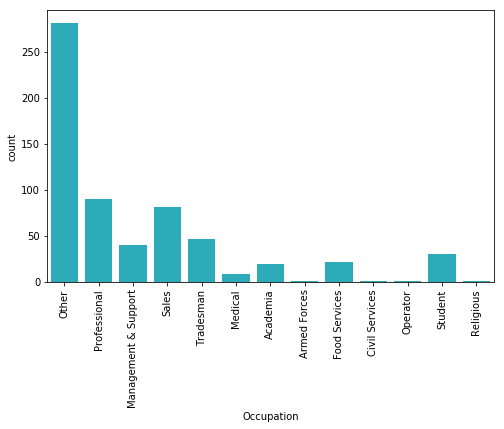

In [156]:
plt.figure(figsize=(8, 5))

ax_62 = sb.countplot(data = prosper[prosper['IncomeRange'] == '$0'], x = 'NewCategory', color = base_color,
                     order = occupation_order)

plt.xticks(rotation = 90)
plt.xlabel('Occupation');

Interpretation: We can see that for the most part, Borrower APR appears to be lower as we increase in Income Range.

One interesting feature is that lenders who report an Income range of $0 are asociated with a Borrower APR that is below the overall average.

We can see from the value_counts, that a large portion of these lenders are in Sales, so they may report $0, but be paid in Commision. 

#### BorrowerAPR vs IncomeRange (Post-2009)

#### ProsperScore vs IncomeRange (Post-2009)

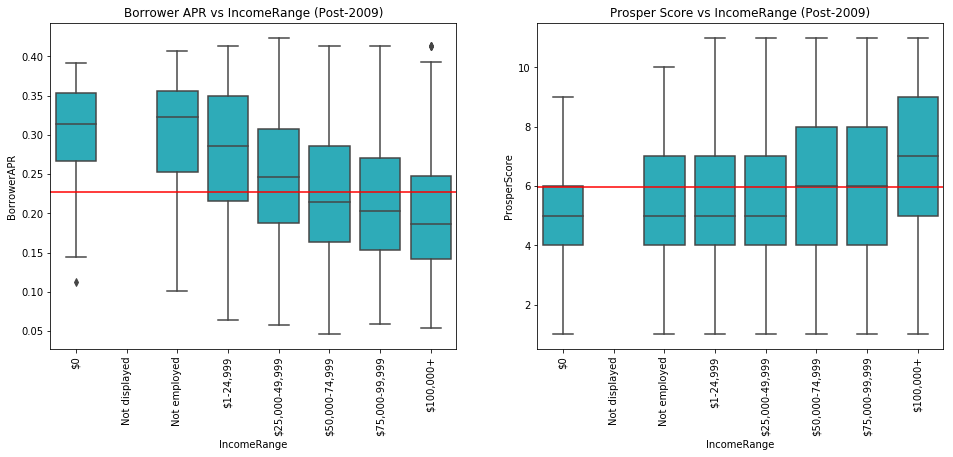

In [157]:
fig = plt.figure(figsize = (16, 6))

ax_63 = plt.subplot(1, 2, 1)
sb.boxplot(data = prosper_subset, x = 'IncomeRange', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR vs IncomeRange (Post-2009)')

ax_64 = plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_subset, x = 'IncomeRange', y = 'ProsperScore',
           color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Score vs IncomeRange (Post-2009)');

In [158]:
prosper_subset['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Not displayed         0
Name: IncomeRange, dtype: int64

Interpretation: These plots show similar trends with the Credit Range plots. As we increase in Income Range, we can see decreasing Borrower APRs and higher Prosper Scores. 

#### Borrower APR vs Debt-to-Income Ratio

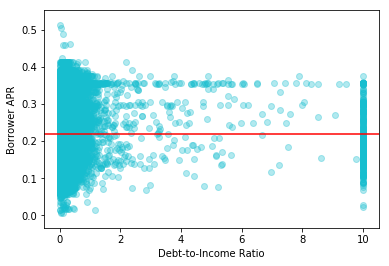

In [159]:
ax_65 = sb.regplot(data = prosper, x = 'DebtToIncomeRatio', y = 'BorrowerAPR',
                   scatter_kws = {'alpha': 1/3}, color = base_color, fit_reg = False)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Borrower APR');

Interpretation: Not a friendly plot. This just tells us that most borrowers have a Debt-to-Income Ratio between 0 and 2, with a Borrower APR that ranges from 0.01 % to 50 %. This also just tells us that a lot of loans with a Debt-to-Income ratio of 10 also have a huge Borrower APR range.

In [160]:
np.random.seed(2019)
sample = np.random.choice(prosper.shape[0], 5000, replace = False)
prosper_subset = prosper.iloc[sample]

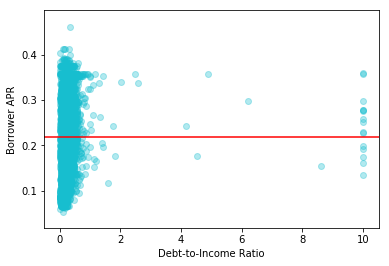

In [161]:
# Test if sampling the data might help

ax_66 = sb.regplot(data = prosper_subset, x = 'DebtToIncomeRatio', y = 'BorrowerAPR',
                   scatter_kws = {'alpha': 1/3}, color = base_color, fit_reg = False)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Borrower APR');

Interpretation: We generally see the same clustering of data points between Debt-to-Income Ratios of 0 and 2. Sampling the data did not appear to help us much.

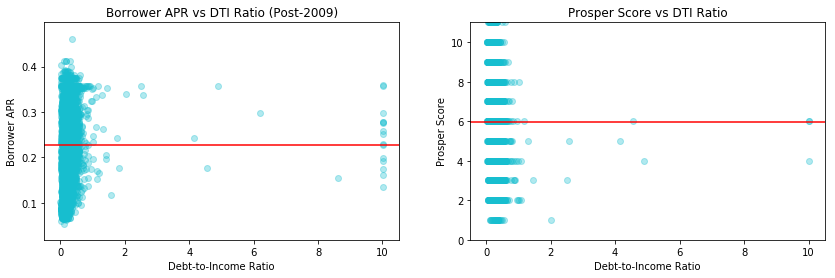

In [162]:
fig = plt.figure(figsize = (14, 4))

ax_67 = plt.subplot(1, 2, 1)
sb.regplot(data = prosper_subset, x = 'DebtToIncomeRatio', y = 'BorrowerAPR',
                   scatter_kws = {'alpha': 1/3}, color = base_color, fit_reg = False)

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs DTI Ratio (Post-2009)')

ax_68 = plt.subplot(1, 2, 2)
sb.regplot(data = prosper_subset, x = 'DebtToIncomeRatio', y = 'ProsperScore',
           scatter_kws = {'alpha': 1/3}, color = base_color, fit_reg = False)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.ylim(0, 11)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Prosper Score')
plt.title('Prosper Score vs DTI Ratio');

Interpretation: These are not friendly plots, and shows us the same trends as the Borrower APR vs Debt-to-Income Ratio (All years) plot. This also just tells us that as we increase Debt-to-Income Ratio, we can reasonably expect the Prosper Score to go down.

In [163]:
mean_DTI = prosper['DebtToIncomeRatio'].mean()

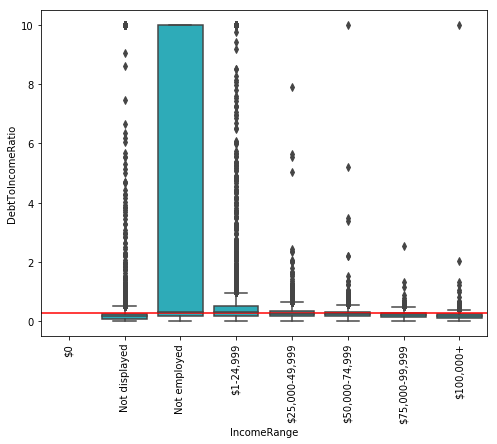

In [164]:
fig = plt.figure(figsize = (8, 6))

ax_69 = sb.boxplot(data = prosper, x = 'IncomeRange', y = 'DebtToIncomeRatio',
                   color = base_color)

plt.axhline(y = mean_DTI, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

Interpretation: The Not Employed column is dominating. Let's see where most of the Debt-to-Income ratios for "Not Employed" borrowers are.

In [165]:
prosper_subset = prosper[prosper['IncomeRange'] == 'Not employed']

prosper_subset.shape

(806, 85)

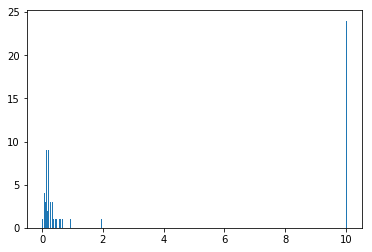

In [166]:
ax_70 = plt.hist(data = prosper_subset[prosper_subset['DebtToIncomeRatio'].isnull() == False], x = 'DebtToIncomeRatio', bins = dtir_bins)

#plt.title('Debt-to-Income Histogram for Unemployed Borrowers');

In [167]:
prosper_subset = prosper[(prosper['IncomeRange'] == 'Not employed') & 
                         (prosper['DebtToIncomeRatio'] >= 8)]

prosper_subset.shape

(24, 85)

In [168]:
prosper_subset = prosper[(prosper['IncomeRange'] == 'Not employed') & 
                         prosper['DebtToIncomeRatio'].isnull()]

prosper_subset.shape

(728, 85)

Interpretation: The number of data points for "Not employed" borrowers that are null far outweigh the data we actually have. This suggests that we can probably just zoom in on the overall plot, but we can't really make an analysis on the "Not employed" borrowers in the same way, because the data are missing.

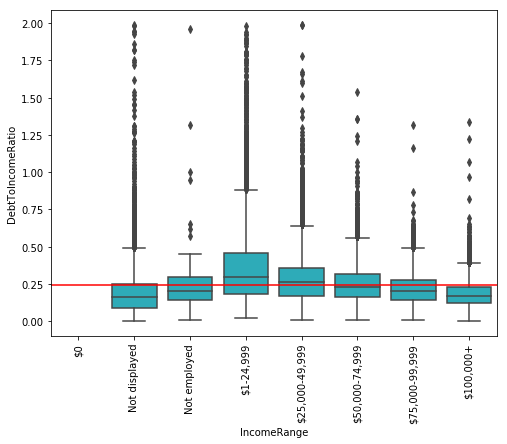

In [169]:
prosper_subset = prosper[prosper['DebtToIncomeRatio'] <= 2]

mean_DTI = prosper_subset['DebtToIncomeRatio'].mean()

fig = plt.figure(figsize = (8, 6))

ax_71 = sb.boxplot(data = prosper_subset, x = 'IncomeRange', y = 'DebtToIncomeRatio',
                   color = base_color)

plt.axhline(y = mean_DTI, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90);

#### Credit Rating vs Listing Category (numeric) (Counts)

Check the demographics of the loan data based on Credit Rating and Listing Category.

In [170]:
crlc_counts = prosper.groupby(['CreditRating', 'ListingCategory (numeric)']).size()
crlc_counts = crlc_counts.reset_index(name = 'count')
crlc_counts.head()

,CreditRating,ListingCategory (numeric),count
0,NC,0,140
1,HR,0,2646
2,HR,1,3528
3,HR,2,713
4,HR,3,703


In [171]:
crlc_counts = crlc_counts.pivot(index = 'CreditRating', columns = 'ListingCategory (numeric)', values = 'count')

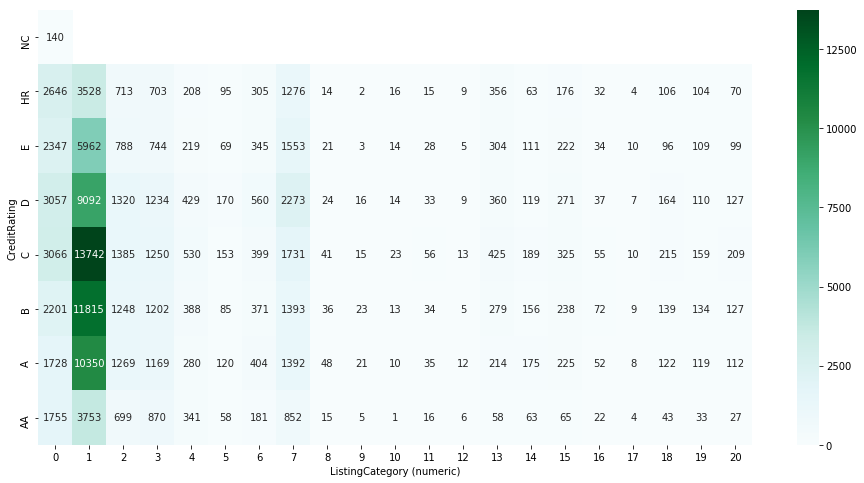

In [172]:
fig = plt.figure(figsize = (16, 8))

ax_72 = sb.heatmap(crlc_counts, annot = True, fmt = '.0f', cmap = 'BuGn');

Interpretation: This plot shows us that most loans are for 1 - Debt Consolidation, have a Credit Rating between an A and D. This also shows in stark contrast, how little of the data is in the other listing categories.

#### Credit Rating vs Employment Status (Counts)

We expect most borrowers to be either Full time or Employed. Hopefully a lot of borrowers have a credit rating above a B.

In [173]:
cres_counts = prosper.groupby(['CreditRating', 'EmploymentStatus']).size()
cres_counts = cres_counts.reset_index(name = 'count')
cres_counts.head()

,CreditRating,EmploymentStatus,count
0,NC,Not available,99
1,HR,Employed,4609
2,HR,Full-time,2567
3,HR,Not available,1172
4,HR,Not employed,219


In [174]:
cres_counts = cres_counts.pivot(index = 'CreditRating', columns = 'EmploymentStatus', values = 'count')
cres_counts

EmploymentStatus,Employed,Full-time,Not available,Not employed,Other,Part-time,Retired,Self-employed
CreditRating,,,,,,,,
NC,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN
HR,4609.0,2567.0,1172.0,219.0,491.0,112.0,85.0,741.0
E,7402.0,2582.0,1042.0,144.0,582.0,112.0,73.0,742.0
D,11004.0,4966.0,865.0,169.0,714.0,262.0,143.0,950.0
C,15002.0,5241.0,749.0,114.0,868.0,192.0,158.0,1303.0
B,13507.0,3674.0,545.0,84.0,600.0,158.0,118.0,1044.0
A,11629.0,4021.0,415.0,78.0,425.0,147.0,106.0,858.0
AA,4157.0,3200.0,460.0,27.0,126.0,98.0,108.0,492.0


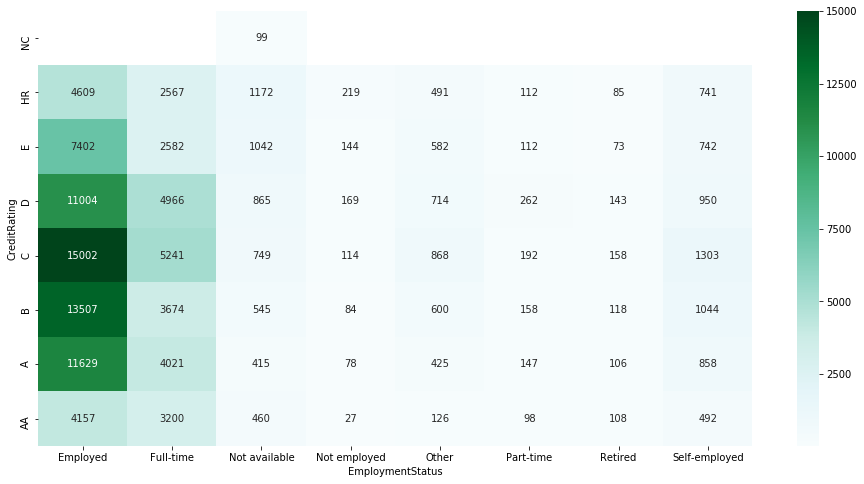

In [175]:
fig = plt.figure(figsize = (16, 8))

ax_73 = sb.heatmap(cres_counts, annot = True, fmt = '.0f', cmap = 'BuGn');

Interpretation: We can see that most borrowers are Employed or Full-time, and have a Credit Rating of at least an E. We'll check CreditRating vs CreditRange too, to confirm this.

#### Credit Rating vs Credit Score Range (Counts)

Check that the borrowers in the A through D range have reasonably good credit.

In [176]:
crcr_counts = prosper.groupby(['CreditRating', 'CreditRange']).size()
crcr_counts = crcr_counts.reset_index(name = 'count')
crcr_counts.head()

,CreditRating,CreditRange,count
0,NC,0 - 19,130
1,HR,0 - 19,3
2,HR,360 - 379,1
3,HR,420 - 439,5
4,HR,440 - 459,36


In [177]:
crcr_counts = crcr_counts.pivot(index = 'CreditRating', columns = 'CreditRange', values = 'count')

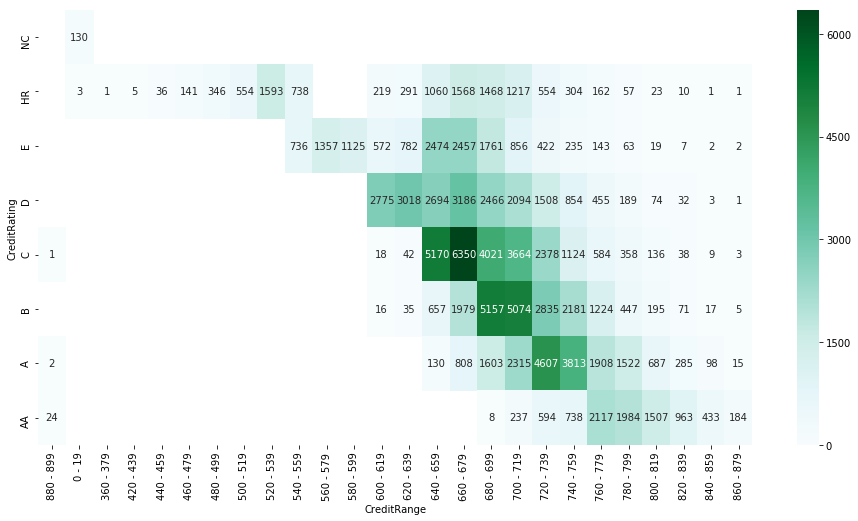

In [178]:
fig = plt.figure(figsize = (16, 8))

ax_74 = sb.heatmap(crcr_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

plt.xticks(rotation = 90);

Interpretation: This shows how most of the data are clustered between Credit Ratings between A and D, and have a Credit Score between 600 and 760. 

#### Credit Rating vs Income Range (Counts)

In [179]:
crir_counts = prosper.groupby(['CreditRating', 'IncomeRange']).size()
crir_counts = crir_counts.reset_index(name = 'count')
crir_counts.head()

,CreditRating,IncomeRange,count
0,NC,Not displayed,140
1,HR,$0,46
2,HR,Not displayed,1627
3,HR,Not employed,218
4,HR,"$1-24,999",1296


In [180]:
crir_counts = crir_counts.pivot(index = 'CreditRating', columns = 'IncomeRange', values = 'count')

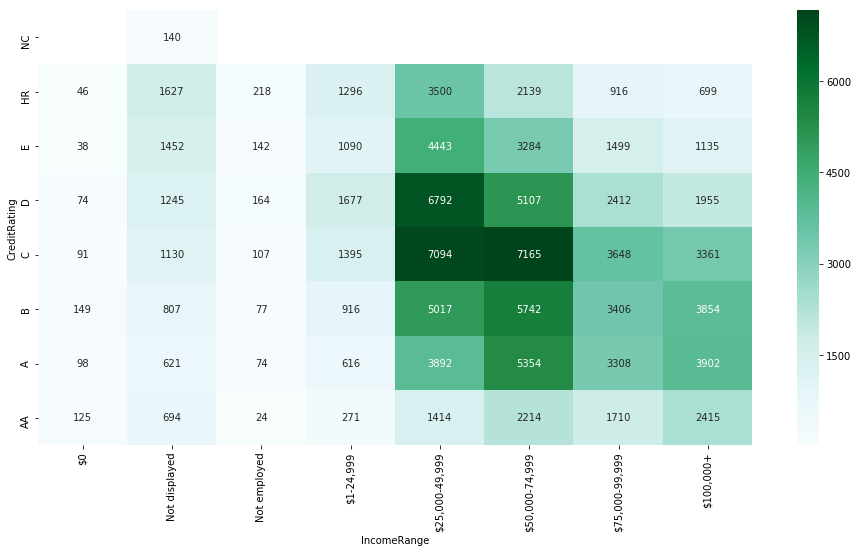

In [181]:
fig = plt.figure(figsize = (16, 8))

ax_75 = sb.heatmap(crir_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

plt.xticks(rotation = 90);

Interpretation: This shows us how Credit Rating is broken down by Income Range. An average loan is probably in an income range between \\$25,000 and \\$80,000, with a Credit Rating between a A and E.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Unless otherwise noted, all trends are applicable to the entire time frame available. Any analysis with Credit Grade is for pre-2009 loan data, and any analysis with Prosper Score or Prosper Rating (Alpha) is for post-2009 data. 

#### Primary relationships:

* Borrower APR vs Loan Status - Borrower APR increases as the Loan Statuses worsens. However, this could mean that higher Borrower APR causes an increased likelyhood that the Loan Status will worsen.
* Prosper Score vs Loan Status - Prosper Score is at a 5 or below for Loan Statuses that are Past Due (1 - 15 days)or below.
* Lender Yield vs Loan Status - Lender Yield increases as the Loan Statuses worsens, up until the loan defaulted. Note however, that these represent the status of a loan, as a snap shot of time, and is no indication of the progression of what a Lender Yield actually is, as a function of the Loan Status, when it goes bad. 
* Estimated Effective Yield vs Loan Status - The Estimated Effective Yield generally appears to increase as the Loan Status worsens, similar to the Borrower APR and Lender Yield. However, since this accounts for more fees and costs, we can see a lot more data points that fall below 0 %, especially for the Completed, Defaulted, and Chargedoff loans.
* Prosper Score vs Loan Status - We generally see a Prosper Score of 5 or below as the Loan Statuses worsen. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### Secondary Traits (Other interesting stuff):

* Borrower APR vs Credit Grade - This data set is representative of loans before 2009. As the Credit Grade gets better, the Borrower APR decreases. However, loans that are in the High Risk, E, or D category (Bad credit) show a lot of outliers with low Borrower APRs, and loans that are in the B, A, and AA category (Good credit) show a lot of outliers with high Borrower APRs. 
* Borrower APR vs Prosper Rating (Alpha) - This data set is representative of loans after 2009. While this set shows the same trends as Credit Grade, the average Borrower APR is higher. 
* Borrower APR vs Listing Category - Loans with a Listing Category in 0 - Not Available or 4 - Personal Loan show the lowest Borrower APR. Loans with a listing Category in 10 - Cosmetic Procedure shows a relatively higher Borrower APR. 
* Prosper Score vs Listing Category (Post-2009) - Most loans have a Prosper Score close to the average of 6. For loans falling under the 0 - Not Available category, the average Prosper Score is closer to 4.5. This suggests that a loan will drop at least a point in Prosper Score if a loan cannot be categorized.
* Borrower APR vs Borrower State - A lot of the states show a Borrower APR close to the average. IA and ME show the lowest Borrower APR, while AL, AR, and SD show the highest Borrower APR. The wide error bars in SD, IA, WY, ME, and ND also suggest that the market for Prosper loans is not very well established in these states (Also seen in the corresponding countplot in the Univariate analysis).
* Prosper Score vs Borrower State (Post-2009) - DC is associated with the highest Prosper Score (Prosper's Algorithm must think that a politician is relatively trustworthy...). The trend is opposite compared to the Borrower APR vs Borrower State (Higher Prosper Score suggests lower Borrower APR and vice versa).
* Borrower APR vs Occupation - Lenders under the Professional and Student categories have the lowest Borrower APR. However, after 2009, we see that lenders in the Professional, Medical, and Academia category have the lowest Borrower APRs. In contrast, lenders in the Student category have a mean Borrower APR above the average.
* Prosper Score vs Occupation (Post-2009) - Most occupations are associated with a Prosper Score at the mean. The Food Services category has the lowest mean Prosper Score, with a corresponding Borrower APR that is higher than the average.
* Borrower APR vs Employment Status - Borrowers in the Other and Not Employed category are associated with the highest mean Borrower APR and are above the average. After 2009, for lenders in the Not Employed category, we can see much a higher mean Borrower APR, paired with a Prosper Score of 5 (Below average).
* Prosper Score vs Occupation (Post-2009) - Not surprisingly, lenders in the Not employed category are associated with the highest Borrower APR. Although lenders in the Self-employed category as associated with a mean Prosper Score of 4, these lenders are also associated with Borrower APRs that are relatively close to the average.
* Borrower APR vs Homeowner Status - Borrowers that are homeowners are generally associated with lower Borrower APRs. 
* Prosper Score vs Homeowner Status - The average Prosper Score between a Homeowner and non-Homeowner is 6. However, because the category is so wide, this is not as useful.
* Borrower APR vs Credit Range - As the Credit Range increases, we can see lower Borrower APRs. Although the box plots show a lot of outliers with high Credit Ranges with high Borrower APR and low Credit Ranges with low Borrower APR, these represent a small portion of the overall dataset. 
* Prosper Score vs Credit Range (Post-2009) - As the Prosper Score increases, we can generally see lower Borrower APRs. 
* Borrower APR vs Income Range - Not surprisingly, Borrower APRs decrease for loans tied to higher income ranges. One interesting feature is that a lender with an Income Range of \\$0 or Not Displayed as associated with lower Borrower APRs. These are not students, but could be borrowers that rely on commission. 
* Prosper Score vs Income Range (Post-2009) - In general, as Prosper Score increases, we can see lower Borrower APRs. However, the mean Prosper Score is 6, with most Income Ranges falling between a mean Prosper Score of 5 and 7. The box plots show less of a linear trend for Prosper Score vs Income Range.
* Borrower APR vs Debt-to-Income Ratio - Nothing earth shattering. As DTI Ratio increases, Borrower APR increases. 
* Prosper Score vs Debt-to-Income Ratio - As DTI Ratio increases, we can expect Prosper Score to decrease.
* CreditRating vs ListingCategory (numeric) - Most loans are in Listing Category 1 - Debt Consolidation. We can also see that of these loans, most of them have a Credit Rating between A and D. 
* CreditRating vs EmploymentStatus - Most borrowers are either Employed or Full-time, and have a Credit Rating between A and D. 
* CreditRating vs CreditRange - Most borrowers have a Credit Range between 600 and 760, and a Credit Rating between A and D. This is relatively consistent with what we would expect of Credit Ratings, where Credit Rating increases as Credit Score improves.
* CreditRating vs IncomeRange - Most borrowers for for income ranges between \\$25,000 and \\$99,999, with a Credit Rating between A and E.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Borrower APR vs Loan Status with Homeowner Status as 3rd Variable

We'll start with the easiest variable to start subdividing by.

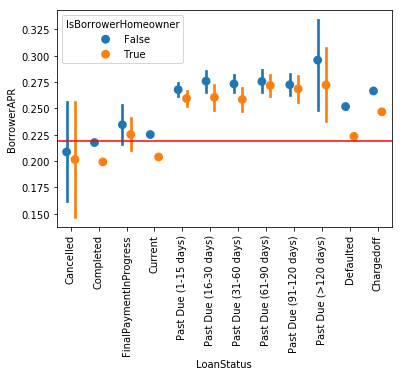

In [182]:
ax_76 = sb.pointplot(data = prosper, x = 'LoanStatus', y = 'BorrowerAPR', 
                     linestyles = '', hue = 'IsBorrowerHomeowner', dodge = 0.3)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: We can clearly see that Homeowners as associated with lower Borrower APR, across all Loan Statuses.

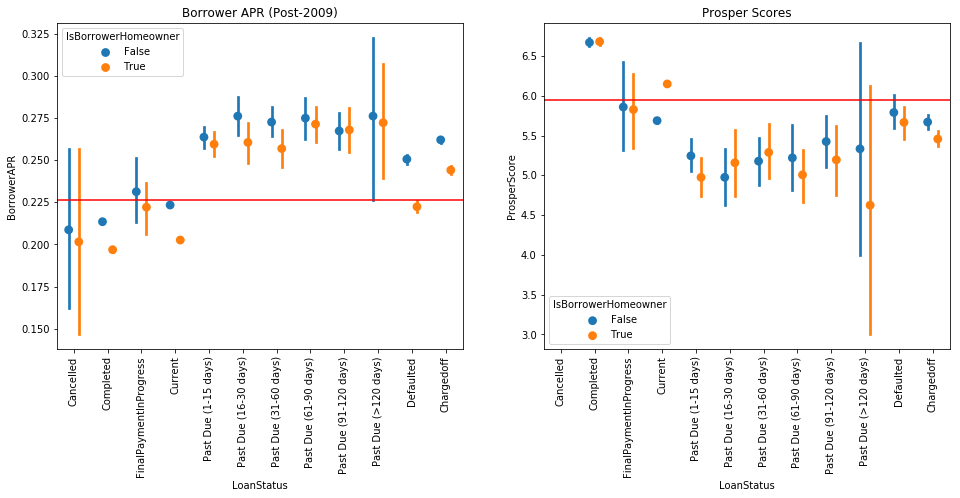

In [183]:
fig = plt.figure(figsize = (16, 6))

ax_77 = plt.subplot(1, 2, 1)
sb.pointplot(data = prosper_subset, x = 'LoanStatus', y = 'BorrowerAPR',
             linestyles = '', hue = 'IsBorrowerHomeowner', dodge = 0.3)
plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Borrower APR (Post-2009)')

ax_78 = plt.subplot(1, 2, 2)
sb.pointplot(data = prosper_subset, x = 'LoanStatus', y = 'ProsperScore',
             linestyles = '', hue = 'IsBorrowerHomeowner', dodge = 0.3)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.title('Prosper Scores');

Interpretation: In general, homeowners appear to be associated with lower Borrower APRs, even after the Financial Crisis of 2008. However, all of these Borrower APRs are above 20 %. However, the Prosper Scores don't seem to be consistently higher or lower.

#### Borrower APR vs Credit Range with Homeowner Status as 3rd Variable

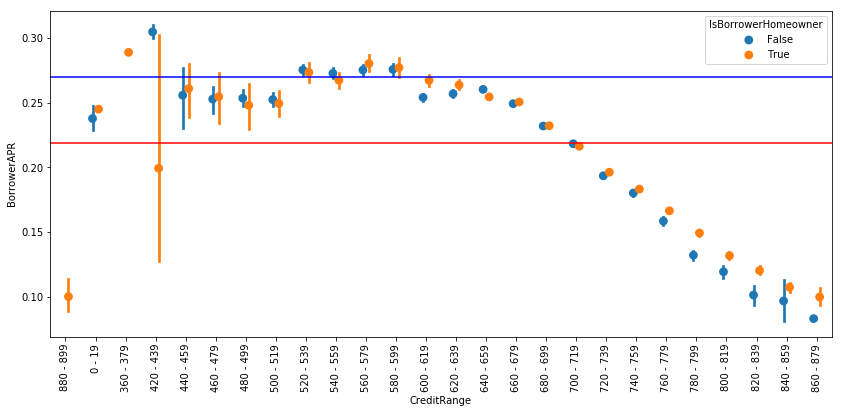

In [184]:
fig = plt.figure(figsize = (14, 6))

ax_79 = sb.pointplot(data = prosper, x = 'CreditRange', y = 'BorrowerAPR', 
                     linestyles = '', hue = 'IsBorrowerHomeowner', dodge = 0.2)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.axhline(y = 0.27, color = 'b', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: As Credit Range increases, we see higher Borrower APRs compared to non-Homeowners. As we get worse credit, we see that homeowner status Borrower APRs that are much closer together.

We can see that Borrower APRs generally peak at 27 % around Credit Ranges between 520 and 600, most likely around 600 (Most of the data in the countplot of Credit Ranges falls within a range of 620 and 800).

#### Borrower APR vs Income Range with Homeowner Status as 3rd Variable

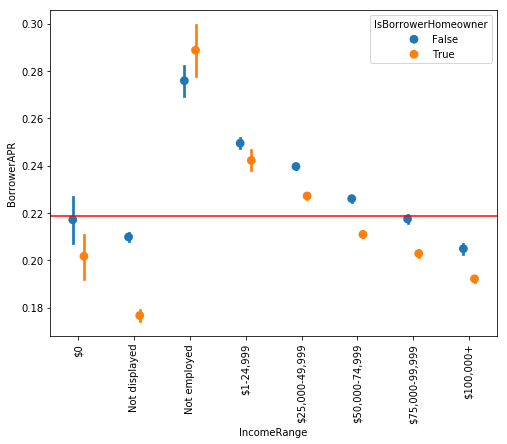

In [185]:
fig = plt.figure(figsize = (8, 6))

ax_80 = sb.pointplot(data = prosper, x = 'IncomeRange', y = 'BorrowerAPR',
                     linestyles = '', hue = 'IsBorrowerHomeowner', dodge = 0.2)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90);

Interpretation: This plot shows that homeowners tend to be associated with lower Borrower APRs across most income ranges, unless the borrower is unemployed.

#### Borrower APR vs Debt to Income Ratio with Homeowner Status as 3rd Variable

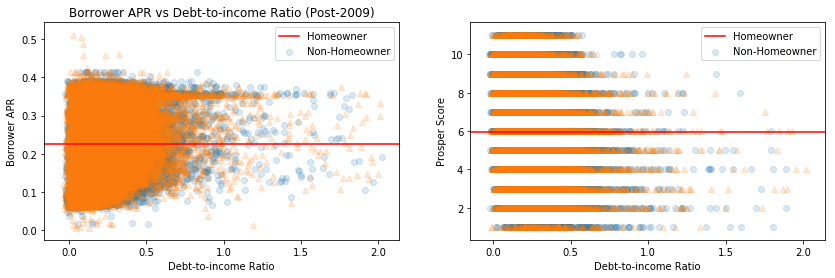

In [186]:
ttype_markers = [[True, 'o'],
                 [False, '^']]
fig = plt.figure(figsize = (14, 4))

ax_81 = plt.subplot(1, 2, 1)
for ttype, marker in ttype_markers:
    plot_data = prosper_subset.loc[prosper_subset['IsBorrowerHomeowner'] == ttype]
    sb.regplot(data = plot_data, x = 'DebtToIncomeRatio', y = 'BorrowerAPR',
               x_jitter = 0.04, fit_reg = False, marker = marker, scatter_kws = {'alpha': 1/6});

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs Debt-to-income Ratio (Post-2009)')
plt.legend(['Homeowner', 'Non-Homeowner'], facecolor = 'white');

ax_82 = plt.subplot(1, 2, 2)
for ttype, marker in ttype_markers:
    plot_data = prosper_subset.loc[prosper_subset['IsBorrowerHomeowner'] == ttype]
    sb.regplot(data = plot_data, x = 'DebtToIncomeRatio', y = 'ProsperScore',
               x_jitter = 0.04, fit_reg = False, marker = marker, scatter_kws = {'alpha': 1/6});

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Prosper Score')

plt.legend(['Homeowner', 'Non-Homeowner'], facecolor = 'white');

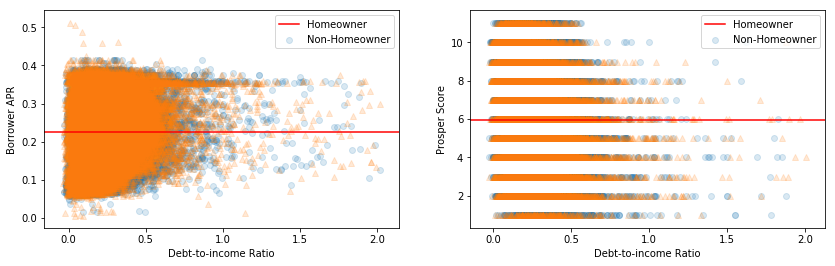

In [187]:
# Test Plots

fig = plt.figure(figsize = (14, 4))

ax_83 = plt.subplot(1, 2, 1)
for ttype, marker in ttype_markers:
    plot_data = prosper_subset.loc[(prosper_subset['IsBorrowerHomeowner'] == ttype) & (prosper_subset['DebtToIncomeRatio'] < 2)]
    sb.regplot(data = plot_data, x = 'DebtToIncomeRatio', y = 'BorrowerAPR',
               x_jitter = 0.04, fit_reg = False, marker = marker, scatter_kws = {'alpha': 1/6});

plt.axhline(y = APR_post2009, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Borrower APR')

plt.legend(['Homeowner', 'Non-Homeowner'], facecolor = 'white');

ax_84 = plt.subplot(1, 2, 2)
for ttype, marker in ttype_markers:
    plot_data = prosper_subset.loc[(prosper_subset['IsBorrowerHomeowner'] == ttype) & (prosper_subset['DebtToIncomeRatio'] < 2)]
    sb.regplot(data = plot_data, x = 'DebtToIncomeRatio', y = 'ProsperScore',
               x_jitter = 0.04, fit_reg = False, marker = marker, scatter_kws = {'alpha': 1/6});

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Prosper Score')

plt.legend(['Homeowner', 'Non-Homeowner'], facecolor = 'white');

Interpretation: Most borrowers have a Borrower APR between 5 and 40 %, and a Debt-to-income ratio below 2. The ranges are huge, and there are no direct linear relationships, even when we just look at data with a DTI Ratio below 2.

We won't analyze any more plots with Homeowner status as the 3rd variable, because we're only seeing trends that we can generally guess by intuition. 

#### Borrower APR vs Listing Category with Current/Completed loans as 3rd Variable

In [188]:
prosper['ListingCategory (numeric)'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

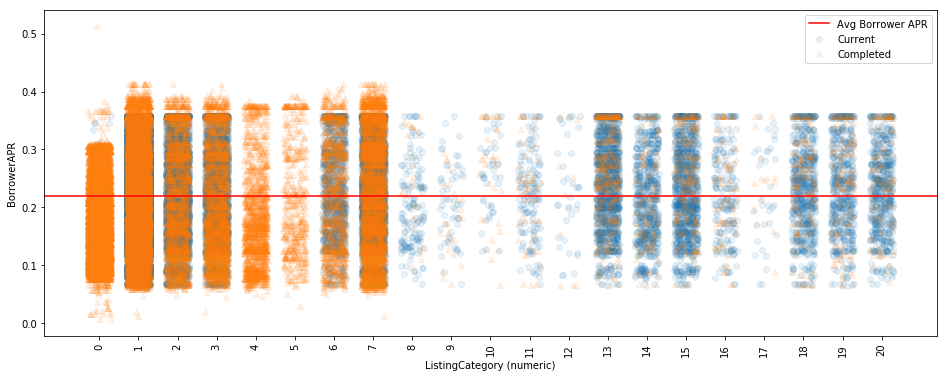

In [189]:
# Plot BorrowerAPR versus Listing Category with Loan Status as the 3rd Variable;

# Look at Current, Defaulted, and Chargedoff variables

prosper_subset = prosper[(prosper['LoanStatus'] == 'Current') | (prosper['LoanStatus'] == 'Completed')]

ax_85 = plt.figure(figsize = (16, 6))

x_ticks = prosper['ListingCategory (numeric)'].value_counts().sort_index().index
x_labels = ['{}'.format(v) for v in x_ticks]

ttype_markers = [['Current', 'o'], 
                 ['Completed', '^']]

for ttype, marker in ttype_markers:
    plot_data = prosper_subset.loc[prosper_subset['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'ListingCategory (numeric)', y = 'BorrowerAPR',
               x_jitter = 0.3, fit_reg = False, marker = marker, scatter_kws = {'alpha': 1/10});

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(x_ticks, x_labels, rotation = 90)
plt.legend(['Avg Borrower APR', 'Current', 'Completed'], facecolor = 'white');

Interpretation: This is a bad plot. All we can see if a huge cluster of data in Listing Categories 0 through 7.

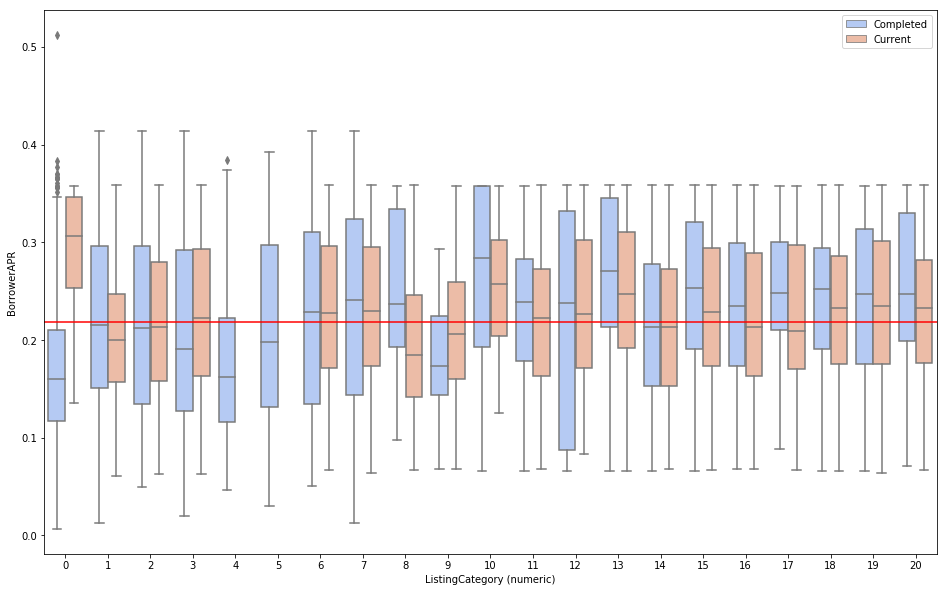

In [190]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Current') | (prosper['LoanStatus'] == 'Completed')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_86 = sb.boxplot(data = prosper_subset, x = 'ListingCategory (numeric)', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'coolwarm');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend();

Interpretation: This plot is a little bit easier to see compared to a point plot. We can see most of average Borrower APRs for each listing category somewhere around the overall average Borrower APR, with a spread between ~0.05 % and 0.35 %.

We can also see that a lot of the Completed loans ended up with a higher Borrower APR.

#### Borrower APR vs Listing Category with Defaulted/Chargedoff loans as 3rd Variable

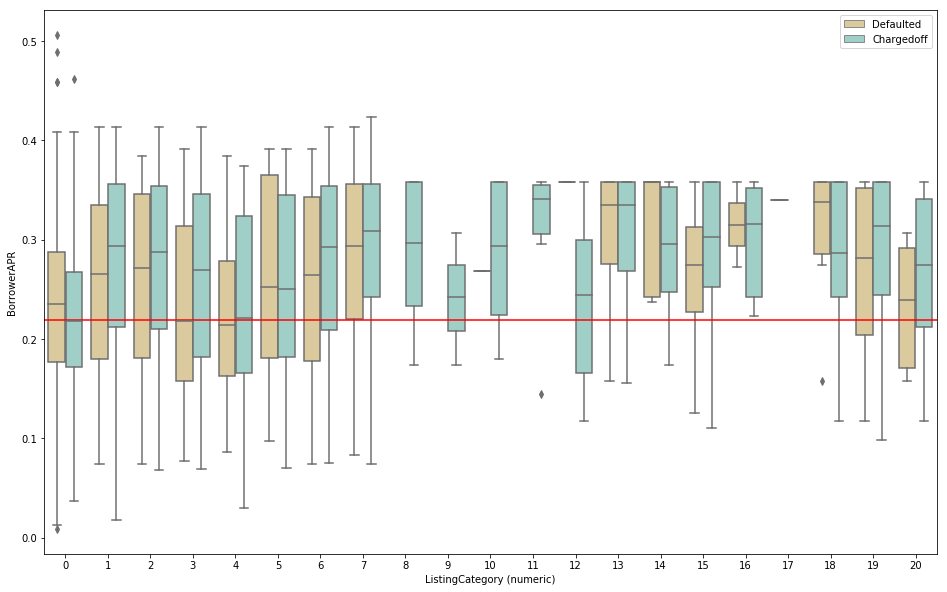

In [191]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_87 = sb.boxplot(data = prosper_subset, x = 'ListingCategory (numeric)', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'BrBG');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend();

Interpretation: For most loans that were Defaulted or Chargedoff, we can see most of the Borrower APRs above the overall average Borrower APR.

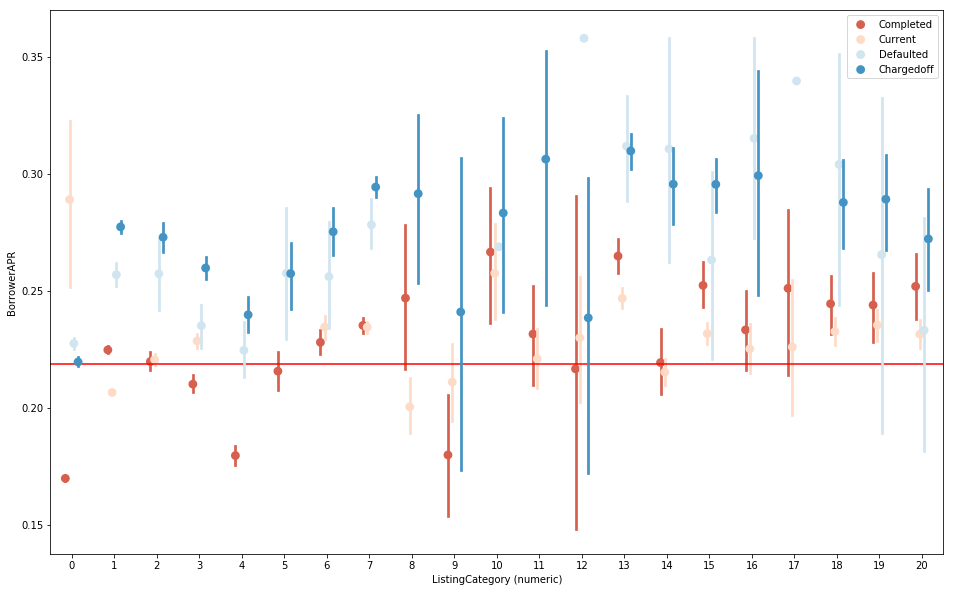

In [192]:
# Test a point plot for all 4 categories we're interested in
# Relatively crowded, but we can see most of the categories together

prosper_subset = prosper[ (prosper['LoanStatus'] == 'Completed') | (prosper['LoanStatus'] == 'Current') | 
                          (prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_88 = sb.pointplot(data = prosper_subset, x = 'ListingCategory (numeric)', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'RdBu', dodge = 0.3, linestyles = '');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend();

#### Borrower APR vs Credit Range with Current/Completed loans as 3rd Variable

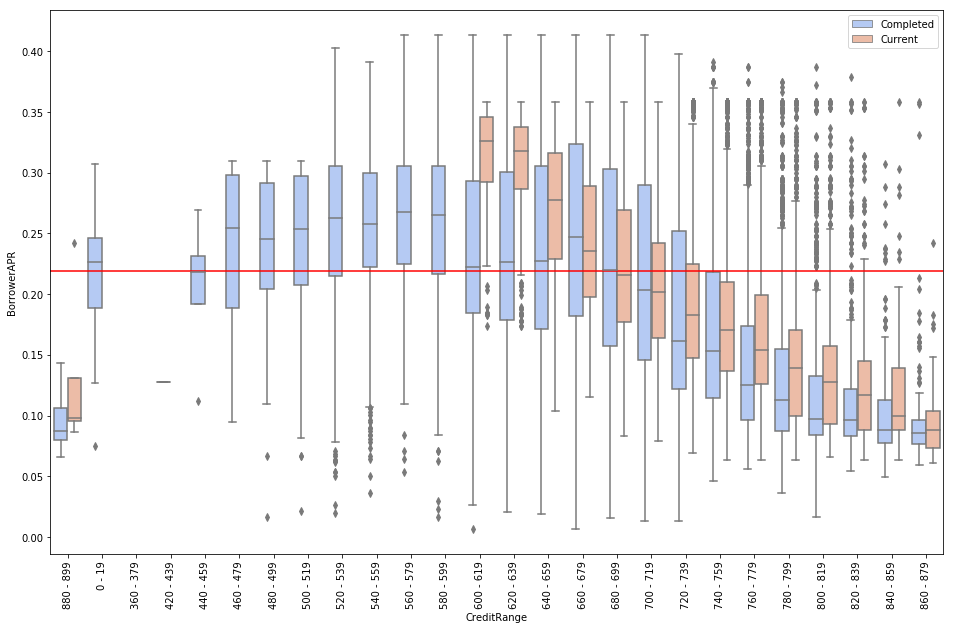

In [193]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Current') | (prosper['LoanStatus'] == 'Completed')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_89 = sb.boxplot(data = prosper_subset, x = 'CreditRange', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'coolwarm');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend()
plt.xticks(rotation = 90);

Interpretation: Not sure why most Current loans have a higher Borrower APR compared to Completed loans, or why the Borrower APR would end up being lower once the loan is paid off.

#### Borrower APR vs Credit Range with Defaulted/Chargedoff loans as 3rd Variable

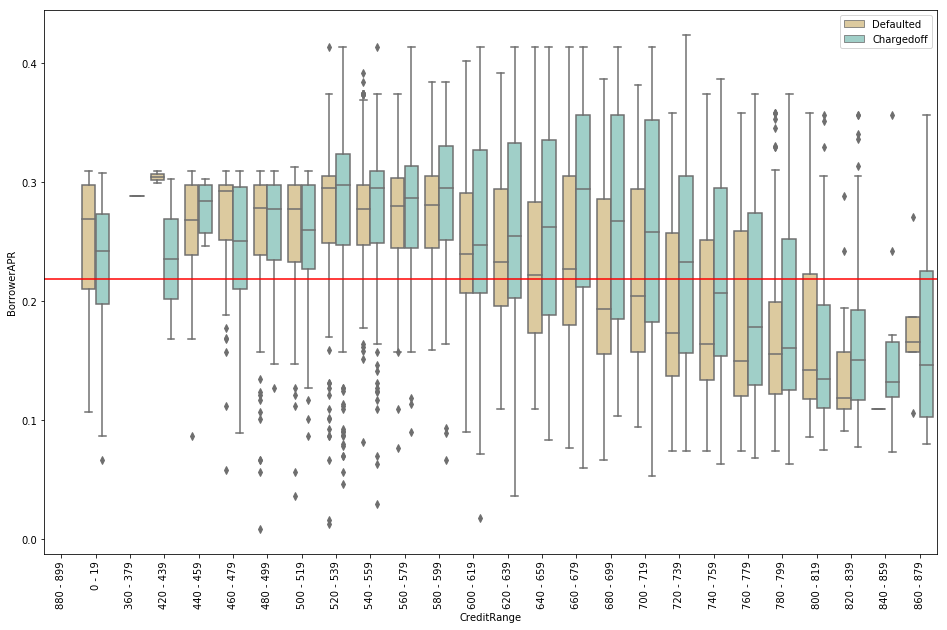

In [194]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_90 = sb.boxplot(data = prosper_subset, x = 'CreditRange', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'BrBG');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend()
plt.xticks(rotation = 90);

Interpretation: Most of the mean Borrower APRs fall above the overall average. We're also not sure how we have so many loans with good credit (Above 700) that have Defaulted or Chargedoff.

#### Borrower APR vs Prosper Score with Current/Completed loans as 3rd Variable

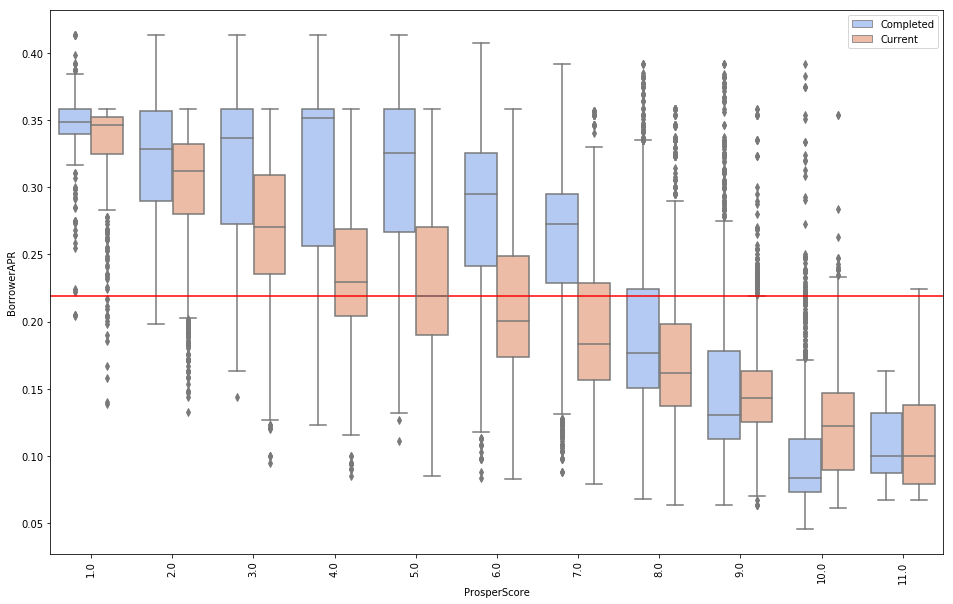

In [195]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Current') | (prosper['LoanStatus'] == 'Completed')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_91 = sb.boxplot(data = prosper_subset, x = 'ProsperScore', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'coolwarm');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend()
plt.xticks(rotation = 90);

#### Borrower APR vs Prosper Score with Defaulted/Chargedoff loans as 3rd Variable

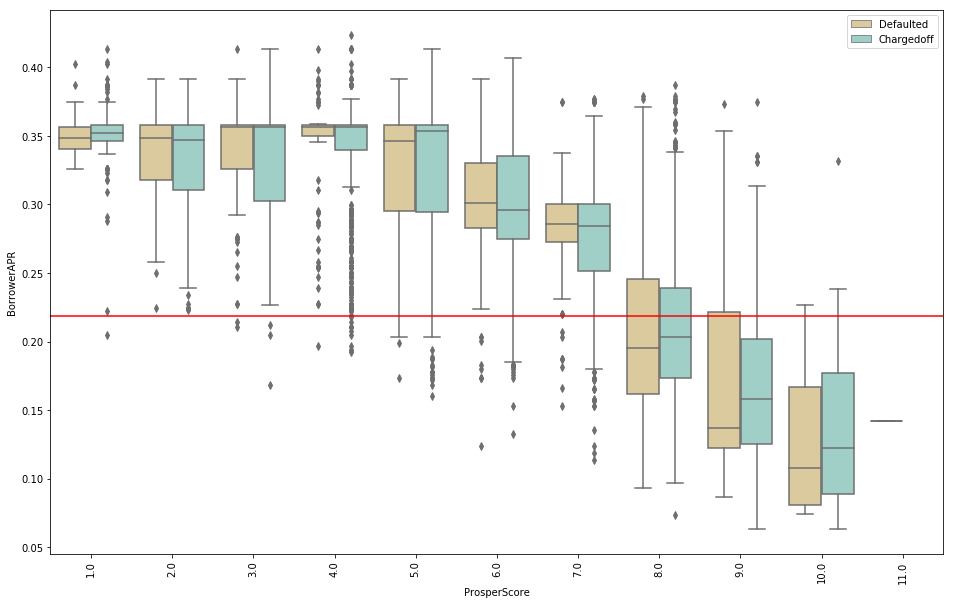

In [196]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

fig = plt.figure(figsize = (16, 10))

ax_92 = sb.boxplot(data = prosper_subset, x = 'ProsperScore', y = 'BorrowerAPR', 
             hue = 'LoanStatus', palette = 'BrBG');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend()
plt.xticks(rotation = 90);

#### Borrower APR vs Income Range with Loan Status as the 3rd variable

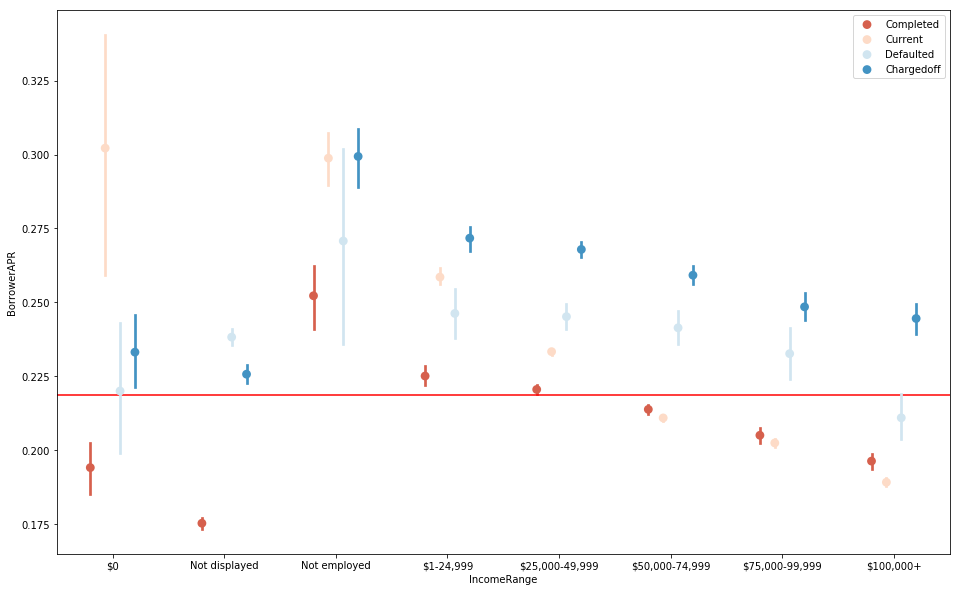

In [197]:
prosper_subset = prosper[(prosper['LoanStatus'] == 'Current') | (prosper['LoanStatus'] == 'Completed') |
                         (prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')]
prosper_subset['LoanStatus'].cat.remove_unused_categories(inplace=True)

ax_93 = plt.figure(figsize = (16, 10))

sb.pointplot(data = prosper_subset, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'LoanStatus',
             linestyles = '', dodge = 0.4, palette = 'RdBu');

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.legend();

Interpretation: As we increase in Income Range, we can see lower Borrower APRs for each loan status. We're not sure how borrowers with an income range of \$100,000+ are getting much lower rates.

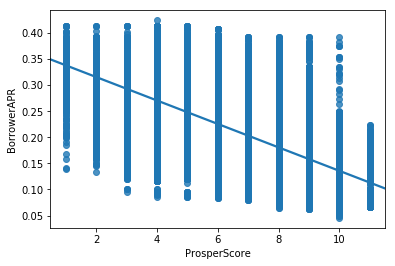

In [198]:
# Checked in Bivariate plots as well
# Code is here to reduce scrolling

ax_94 = sb.regplot(data = prosper, x = 'ProsperScore', y = 'BorrowerAPR');

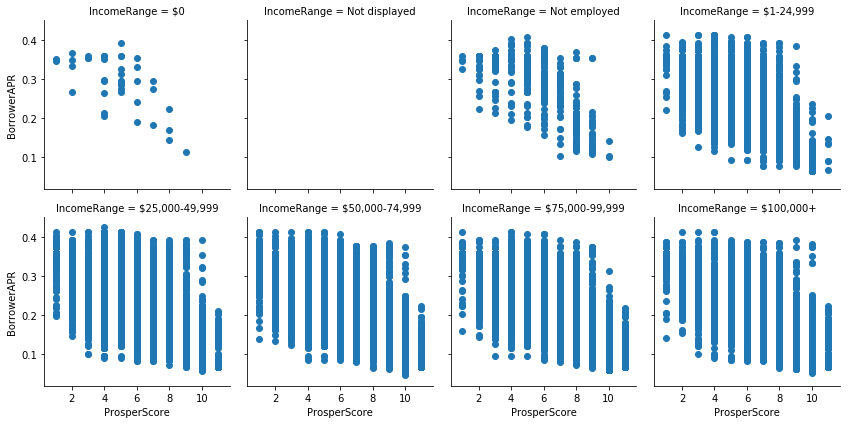

In [199]:
ax_95 = sb.FacetGrid(data = prosper, col = 'IncomeRange', col_wrap = 4)
ax_95.map(plt.scatter, 'ProsperScore', 'BorrowerAPR');

Interpretation: Huge ranges. Nothing super useful from these plots.

#### Borrower APR vs Monthly Loan Payment

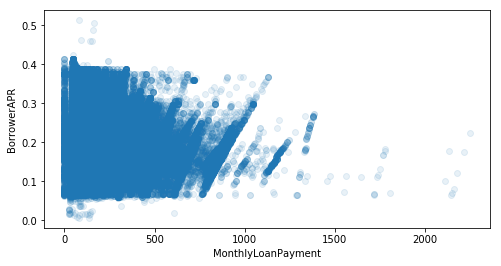

In [200]:
fig = plt.figure(figsize = (8, 4))

ax_96 = sb.regplot(data = prosper, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', 
                   scatter_kws = {'alpha': 1/10}, fit_reg = False);

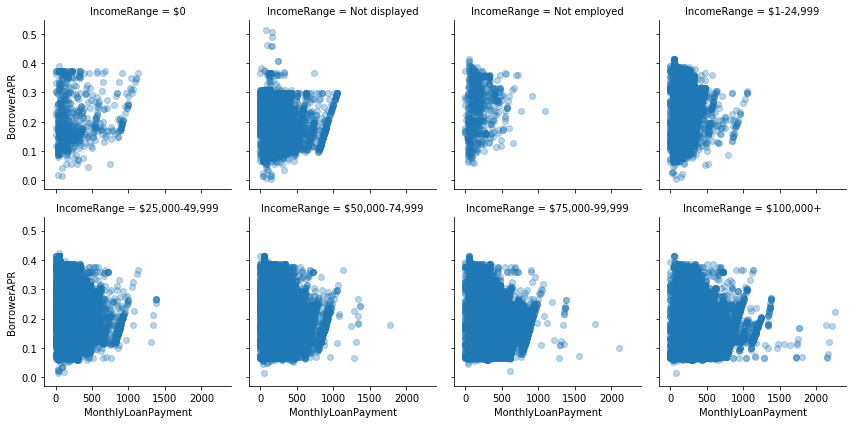

In [201]:
ax_97 = sb.FacetGrid(data = prosper, col = 'IncomeRange', col_wrap = 4)
ax_97.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR', alpha = 0.3);

Interpretation: This FacetGrid tells us that we see the same type clustering in Borrower APR vs Monthly Loan Payment between the top 3 Income Ranges, or \\$50,000 and above. At the Income Range of \\$25,000-49,999 and below, we start seeing most of the data below a Monthly Loan Payment of \\$1,000 (Which is still very high for low income borrowers).

#### Credit Rating vs Listing Categories (Average Borrower APR)

We'll focus on the top 10 categories (Where most of the data seems to be located, based on the count heat plots above)

In [202]:
crir_borrowerAPR = prosper.groupby(['CreditRating', 'ListingCategory (numeric)'])['BorrowerAPR'].mean()
crir_borrowerAPR = crir_borrowerAPR.reset_index(name = 'averages')
crir_borrowerAPR = crir_borrowerAPR.pivot(index = 'CreditRating', columns = 'ListingCategory (numeric)', values = 'averages')

crir_borrowerAPR = crir_borrowerAPR * 100

In [203]:
# Range of Listing Categories we want to view

categories = np.arange(0, 11, 1)
categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

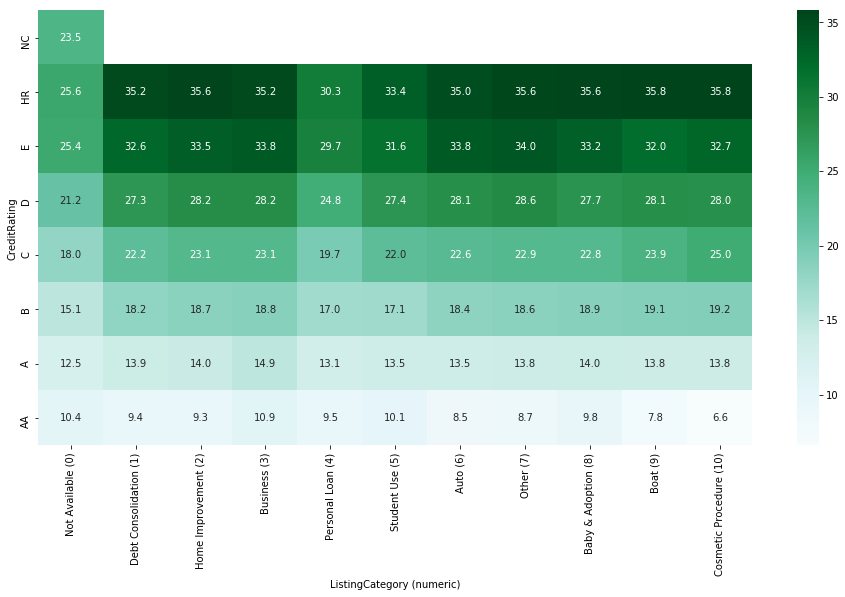

In [204]:
fig = plt.figure(figsize = (16, 8))

ax_98 = sb.heatmap(crir_borrowerAPR[categories], annot = True, fmt = '.1f', cmap = 'BuGn')

ax_98.set_xticklabels(lc_ticks[0:11])
plt.xticks(rotation = 90);

Interpretation: Now we can really see which loan types get the highest Borrower APRs, and these are the HR loans across most Listing Categories.

#### Credit Rating vs Employment Status (Average Borrower APR)

We'll check how average Borrower APRs stack up against Credit Rating and Employment Status as well.

In [205]:
cres_borrowerAPR = prosper.groupby(['CreditRating', 'EmploymentStatus'])['BorrowerAPR'].mean()
cres_borrowerAPR = cres_borrowerAPR.reset_index(name = 'averages')
cres_borrowerAPR = cres_borrowerAPR.pivot(index = 'CreditRating', columns = 'EmploymentStatus', values = 'averages')

cres_borrowerAPR = cres_borrowerAPR * 100

In [206]:
# Look at a subset of the average Borrower APR data, based on the count heat plots above

cres_subset = cres_borrowerAPR[['Employed', 'Full-time', 'Not available', 'Self-employed']]

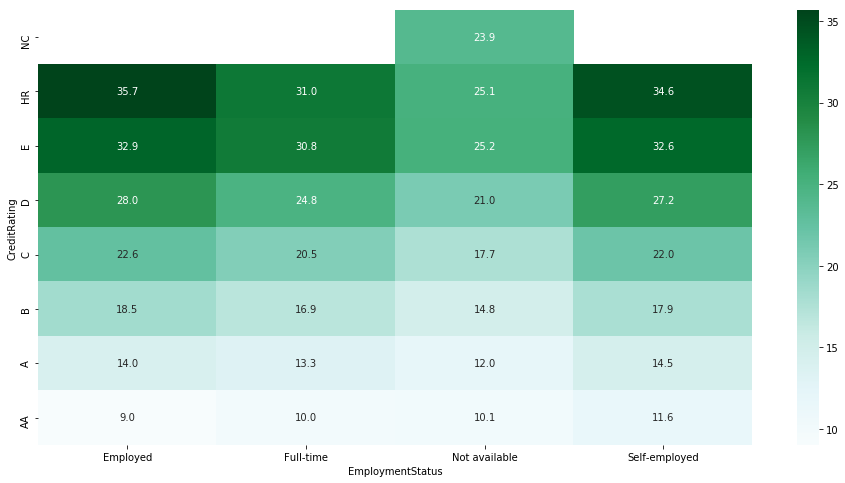

In [207]:
fig = plt.figure(figsize = (16, 8))

ax_99 = sb.heatmap(cres_subset, annot = True, fmt = '.1f', cmap = 'BuGn');

Interpretation: We can see that HR and E rated loans get the highest Borrower APRs across the loan statuses with the most loans.

#### Credit Rating vs Credit Score Range (Average Borrower APR)

Check the average Borrower APRs.

In [208]:
crcr_borrowerAPR = prosper.groupby(['CreditRating', 'CreditRange'])['BorrowerAPR'].mean()
crcr_borrowerAPR = crcr_borrowerAPR.reset_index(name = 'averages')
crcr_borrowerAPR = crcr_borrowerAPR.pivot(index = 'CreditRating', columns = 'CreditRange', values = 'averages')

crcr_borrowerAPR = crcr_borrowerAPR.sort_index(ascending = False)
crcr_borrowerAPR = crcr_borrowerAPR * 100

In [209]:
# '600 - 619', '620 - 639', '640 - 659', '660 - 679', '680 - 699', '700 - 719', '720 - 739', '740 - 759'

sub_crange = ['600 - 619', '620 - 639', '640 - 659', '660 - 679', '680 - 699', '700 - 719', '720 - 739', '740 - 759']
sub_crating = ['E', 'D', 'C', 'B', 'A']

crcr_subset = crcr_borrowerAPR[sub_crange].loc[sub_crating]
crcr_subset = crcr_subset.sort_index(ascending = False)

In [210]:
crcr_subset

CreditRange,600 - 619,620 - 639,640 - 659,660 - 679,680 - 699,700 - 719,720 - 739,740 - 759
CreditRating,,,,,,,,
A,NaN,NaN,14.241523,14.458604,14.199763,13.664172,13.783418,13.668687
B,18.551625,18.816314,18.996374,18.587226,17.571939,17.587966,18.276011,18.387144
C,24.542222,23.933500,20.652598,21.229983,22.334160,22.479085,22.689241,23.464923
D,23.397974,23.170322,27.924102,27.747293,27.820581,27.867301,28.603542,28.895785
E,33.677212,33.422403,32.574767,32.929100,33.193244,33.415095,33.331680,33.249315


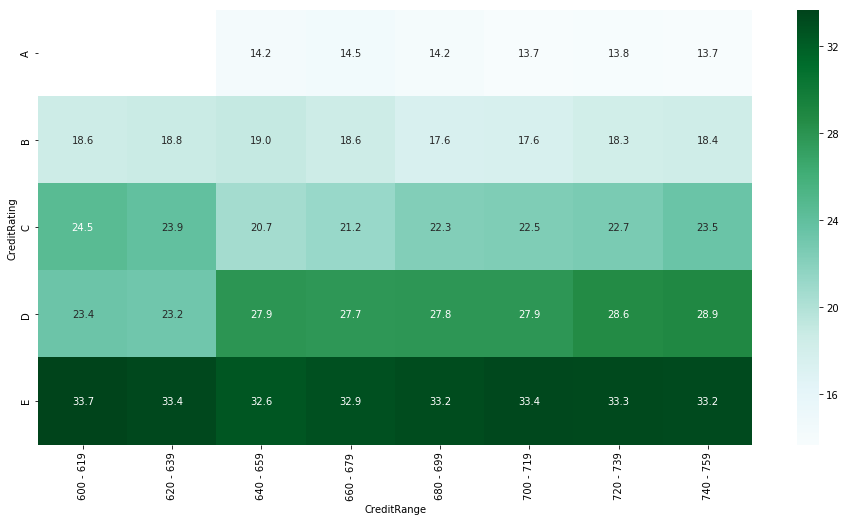

In [211]:
fig = plt.figure(figsize = (16, 8))

ax_100 = sb.heatmap(crcr_subset, annot = True, fmt = '.1f', cmap = 'BuGn')

plt.xticks(rotation = 90);

Interpretation: We can see that all of the loans with a Credit Rating of E get pretty high Borrower APRs. However, note that the Credit Range / Credit Rating combo of 740 - 759 / E has fewer than 300 data points (Based on the count heat plot we generated above), which is a very small subset of the data.

#### Credit Rating vs Income Range (Average Borrower APR)

Check the average Borrower APRs.

In [212]:
crir_borrowerAPR = prosper.groupby(['CreditRating', 'IncomeRange'])['BorrowerAPR'].mean()
crir_borrowerAPR = crir_borrowerAPR.reset_index(name = 'averages')
crir_borrowerAPR = crir_borrowerAPR.pivot(index = 'CreditRating', columns = 'IncomeRange', values = 'averages')

crir_borrowerAPR = crir_borrowerAPR * 100

In [213]:
sub_irange = ['Not displayed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sub_crating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

crir_subset = crir_borrowerAPR[sub_irange].loc[sub_crating]
crir_subset = crir_subset.sort_index(ascending = False)

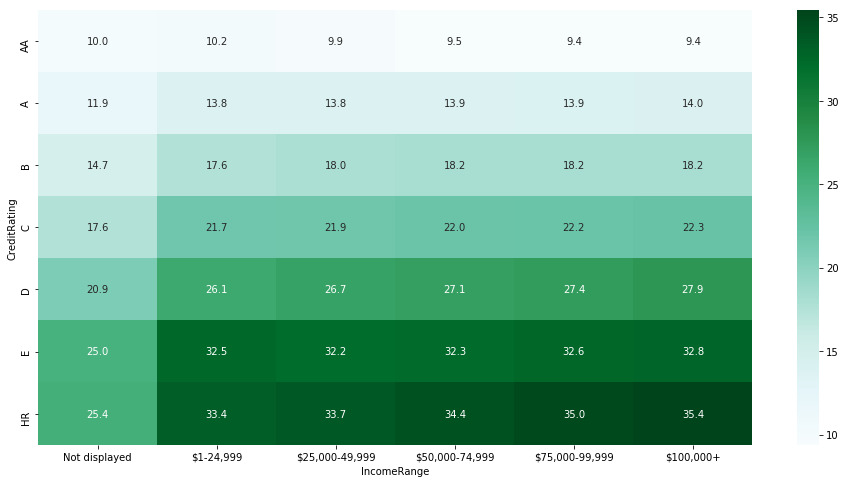

In [214]:
fig = plt.figure(figsize = (16, 8))

ax_101 = sb.heatmap(crir_subset, annot = True, fmt = '.1f', cmap = 'BuGn');

Interpretation: As expected, we increase Borrower APR as the Credit Rating worsens. We see that for Credit Ranges A, B, C, D, E, and HR, average Borrower APR actually increases as we increase income range. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<ul>
<li>Homeowner Status as 3rd Variable - When we looked at various Bivariate plots with Homeowner Status as a 3rd encoding (Borrower APR vs Loan Status, Borrower APR vs Credit Range, and Borrower APR vs Income Range), we could see that Homeowners are generally associated with a lower Borrower APR across the board. When we looked at Borrower APR vs Debt-to-Income Ratio, we just saw a cluster of data from a Debt-to-Income Ratio between 0 and 2 and a huge Borrower APR range between 0 and 40 %. </li>
<li>Loan Status as 3rd Variable - We broke down the data between Current/Completed and Defaulted/Charged off loans. </li>
<ul>
<li>For Borrower APR vs Listing Category, the only thing we can see is that most Current/Completed loans fall somewhere around the overall average Borrower APR. The Defaulted/Chargedoff loans have a mean Borrower APR above the overall average, for each listing category. </li>
<li> For Borrower APR vs Credit Range, we can see most of the Current loans actually have a higher Borrower APR for Credit Ranges above 720. Most of the Defaulted/Chargedoff loans have a mean Borrower APR above the overall average, for each Credit Range. </li>
<li> For Borrower APR vs Prosper Score, we can see the average Borrower APR drop below the overall average when we get above a Prosper Score of 7. Both Current/Completed and Defaulted/Chargedoff sets of plots show similar trends. </li>
<li> For Borrower APR vs Income Range, we see most of the Current/Completed loans with a Borrower APR well below the Defaulted/Chargedoff loans, and steadily decreasing as we increase in Income Range. </li>
<li> Income Range as 3rd Variable - We looked at Borrower APR vs Monthly Loan Payment and found that there is similar clustering of data for income ranges above \$50,000. </li></ul>
<li>Credit Rating vs Listing Categories (Average Borrower APR) - For the top 10 listing categories, where we see the most data (Based on count heat plots generated in previous section), Credit Ratings at a E or HR have the highest average Borrower APRs.</li>
<li>Credit Rating vs Employment Status (Average Borrower APR) - Amongst Employed, Full-time, Not available, and self-employed borrowers, we can see the highest average Borrower APRs for the E and HR credit ratings. For each loan status, average Borrower APR increases as credit rating worsens.</li>
<li>Credit Rating vs Credit Score Range (Average Borrower APR) - For credit score ranges between 600 and 760, Credit Ratings at a D or E get the highest average Borrower APRs.</li>
<li>Credit Rating vs Income Range (Average Borrower APR) - For each Income Range, average Borrower APR increases as Credit Rating worsens. </li>
</ul>

### Were there any interesting or surprising interactions between features?

We saw a few average Borrower APRs actually increase as we increase Income Range.

Sources:
1. Borrower Rate vs BorrowerAPR: https://prosper.zendesk.com/hc/en-us/articles/208500686-What-is-the-difference-between-Interest-Rate-and-APR-
2. Credit Grade ordering: https://www.lendacademy.com/prosper-review/

3. International Standard Classification of Occupations: https://en.wikipedia.org/wiki/International_Standard_Classification_of_Occupations

4. Pilot Career Requirements: https://study.com/be_an_airline_pilot.html

5. Flight Attendant Career Requirements: https://study.com/articles/Flight_Attendant_Educational_and_Training_Requirements.html

6. Prosper Recommended Minimum Credit Score: https://www.prosper.com/vib/healthcare/program_select?provider_id=003738

7. Poverty Guideline: https://www.prb.org/insight/u-s-poverty-thresholds-and-poverty-guidelines-whats-the-difference/

8. Typical Loan Interest Rate by Credit Score: https://www.valuepenguin.com/personal-loans/average-personal-loan-interest-rates

9. Prosper Ratings: https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline

10. Prosper Marketplace: https://en.wikipedia.org/wiki/Prosper_Marketplace

11. Prosper Personal Loans: 2019 Comprehensive Review: https://www.bankrate.com/loans/personal-loans/reviews/prosper/